In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Step 1: Load the Data
file_path = '/Users/rohanpadaya/Desktop/pankit_assign/Stock_data_part1.csv'  
stock_data_1 = pd.read_csv(file_path, low_memory=False)


In [3]:
stock_data_1.head()

,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,OPENPRC,NUMTRD,sprtrn
0,10026,2019-08-20,11.0,JJSF,J & J SNACK FOODS CORP,7976,190.9700,196.74001,191.13000,136698.0,-0.020298,191.00000,191.13000,18841.0,194.70000,1903.0,-0.007915
1,10026,2019-08-21,11.0,JJSF,J & J SNACK FOODS CORP,7976,188.5025,192.56000,189.35001,101583.0,-0.009313,189.17000,189.35001,18841.0,191.98000,2252.0,0.008247
2,10026,2019-08-22,11.0,JJSF,J & J SNACK FOODS CORP,7976,187.9800,190.39000,189.32001,92198.0,-0.000158,189.32001,189.50000,18841.0,188.89999,1805.0,-0.000506
3,10026,2019-08-23,11.0,JJSF,J & J SNACK FOODS CORP,7976,185.5900,190.35001,186.14999,75522.0,-0.016744,186.14000,186.28000,18841.0,189.22000,1629.0,-0.025946
4,10026,2019-08-26,11.0,JJSF,J & J SNACK FOODS CORP,7976,186.7000,191.39999,191.23000,81788.0,0.027290,191.03999,191.25000,18841.0,187.11000,2070.0,0.010983


In [4]:
stock_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938801 entries, 0 to 1938800
Data columns (total 17 columns):
 #   Column   Dtype  
---  ------   -----  
 0   PERMNO   int64  
 1   date     object 
 2   SHRCD    float64
 3   TICKER   object 
 4   COMNAM   object 
 5   PERMCO   int64  
 6   BIDLO    float64
 7   ASKHI    float64
 8   PRC      float64
 9   VOL      float64
 10  RET      object 
 11  BID      float64
 12  ASK      float64
 13  SHROUT   float64
 14  OPENPRC  float64
 15  NUMTRD   float64
 16  sprtrn   float64
dtypes: float64(11), int64(2), object(4)
memory usage: 251.5+ MB


In [5]:
# Step 2: Convert RET to numeric, coercing errors
stock_data_1['RET'] = pd.to_numeric(stock_data_1['RET'], errors='coerce')

# Check for any other object types that should be numeric
stock_data_1['SHRCD'] = pd.to_numeric(stock_data_1['SHRCD'], errors='coerce')

# Step 3: Convert 'date' column to datetime
stock_data_1['date'] = pd.to_datetime(stock_data_1['date'])


In [6]:
stock_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938801 entries, 0 to 1938800
Data columns (total 17 columns):
 #   Column   Dtype         
---  ------   -----         
 0   PERMNO   int64         
 1   date     datetime64[ns]
 2   SHRCD    float64       
 3   TICKER   object        
 4   COMNAM   object        
 5   PERMCO   int64         
 6   BIDLO    float64       
 7   ASKHI    float64       
 8   PRC      float64       
 9   VOL      float64       
 10  RET      float64       
 11  BID      float64       
 12  ASK      float64       
 13  SHROUT   float64       
 14  OPENPRC  float64       
 15  NUMTRD   float64       
 16  sprtrn   float64       
dtypes: datetime64[ns](1), float64(12), int64(2), object(2)
memory usage: 251.5+ MB


In [7]:
# Check the minimum and maximum dates in the dataset
print("Date range in the dataset:")
print("Min date:", stock_data_1['date'].min())
print("Max date:", stock_data_1['date'].max())


Date range in the dataset:
Min date: 2019-08-20 00:00:00
Max date: 2020-08-20 00:00:00


In [8]:
nan_counts = stock_data_1.isna().sum()

# Display the number of NaN values for each column
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
PERMNO           0
date             0
SHRCD           24
TICKER       10218
COMNAM          24
PERMCO           0
BIDLO        11470
ASKHI        11470
PRC          11470
VOL          11470
RET          12052
BID          11479
ASK          11480
SHROUT         418
OPENPRC      51696
NUMTRD     1144054
sprtrn           0
dtype: int64


In [9]:
# Drop rows with NaN in critical columns (RET, PRC, BID, ASK)
stock_data_1_cleaned = stock_data_1.dropna(subset=['RET', 'PRC', 'BID', 'ASK', 'TICKER'])

# Drop the NUMTRD column due to excessive missing values
stock_data_1_cleaned = stock_data_1_cleaned.drop(columns=['NUMTRD'])

# Consider dropping or filling OPENPRC based on its necessity
# Example: Drop OPENPRC if not essential
stock_data_1_cleaned = stock_data_1_cleaned.drop(columns=['OPENPRC'])

# Handle remaining columns with moderate NaN values
# Example: Drop rows with missing BIDLO, ASKHI, VOL
stock_data_1_cleaned = stock_data_1_cleaned.dropna(subset=['BIDLO', 'ASKHI', 'VOL'])

# Optionally fill missing values in columns with very few NaNs, like SHRCD, COMNAM, and SHROUT
# For example, filling with the mode or a placeholder value
stock_data_1_cleaned['SHRCD'].fillna(stock_data_1_cleaned['SHRCD'].mode()[0], inplace=True)
stock_data_1_cleaned['COMNAM'].fillna("Unknown", inplace=True)
stock_data_1_cleaned['SHROUT'].fillna(stock_data_1_cleaned['SHROUT'].median(), inplace=True)


In [10]:
# Check the shape of the cleaned data
print("Shape of the cleaned data:", stock_data_1_cleaned.shape)


Shape of the cleaned data: (1926738, 15)


In [11]:
nan_counts_2 = stock_data_1_cleaned.isna().sum()

# Display the number of NaN values for each column
print("Number of NaN values in each column:")
print(nan_counts_2)

Number of NaN values in each column:
PERMNO    0
date      0
SHRCD     0
TICKER    0
COMNAM    0
PERMCO    0
BIDLO     0
ASKHI     0
PRC       0
VOL       0
RET       0
BID       0
ASK       0
SHROUT    0
sprtrn    0
dtype: int64


In [12]:
duplicates = stock_data_1_cleaned.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [13]:
print(stock_data_1_cleaned.dtypes)


PERMNO             int64
date      datetime64[ns]
SHRCD            float64
TICKER            object
COMNAM            object
PERMCO             int64
BIDLO            float64
ASKHI            float64
PRC              float64
VOL              float64
RET              float64
BID              float64
ASK              float64
SHROUT           float64
sprtrn           float64
dtype: object


             PERMNO                           date         SHRCD  \
count  1.926738e+06                        1926738  1.926738e+06   
mean   4.662152e+04  2020-02-19 12:30:49.444605440  3.239542e+01   
min    1.002600e+04            2019-08-20 00:00:00  1.100000e+01   
25%    1.597300e+04            2019-11-18 00:00:00  1.100000e+01   
50%    1.900700e+04            2020-02-20 00:00:00  1.200000e+01   
75%    8.653600e+04            2020-05-21 00:00:00  7.300000e+01   
max    9.343600e+04            2020-08-20 00:00:00  7.500000e+01   
std    3.433517e+04                            NaN  2.763045e+01   

             PERMCO         BIDLO         ASKHI           PRC           VOL  \
count  1.926738e+06  1.926738e+06  1.926738e+06  1.926738e+06  1.926738e+06   
mean   4.187518e+04  7.859034e+01  8.030824e+01  7.838405e+01  1.240891e+06   
min    5.000000e+00  3.000000e-04  2.600000e-02 -6.525300e+02  0.000000e+00   
25%    3.049200e+04  8.850000e+00  9.300000e+00  8.130000e+00  2.008300

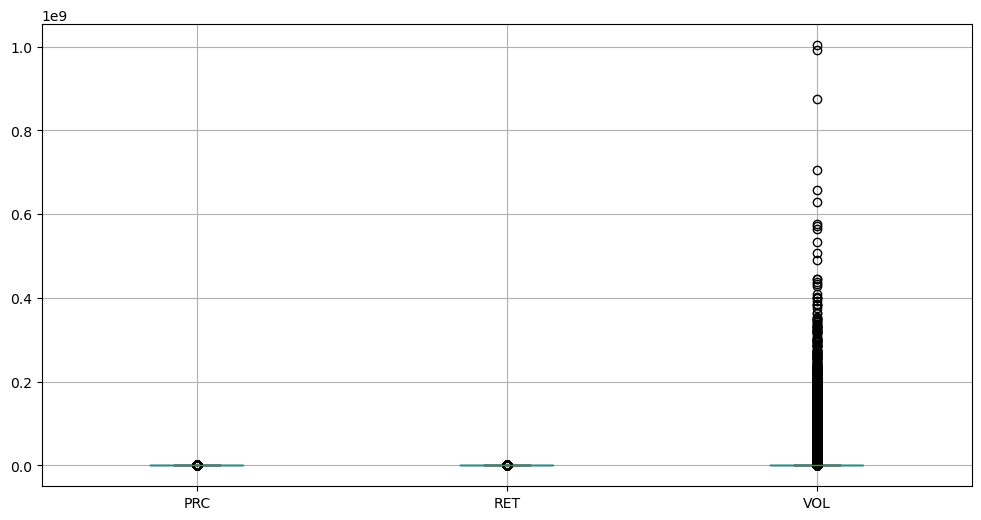

In [14]:
# Quick summary statistics to spot outliers
print(stock_data_1_cleaned.describe())

# Visual check for outliers (e.g., using boxplots)
stock_data_1_cleaned[['PRC', 'RET', 'VOL']].boxplot(figsize=(12, 6))
plt.show()


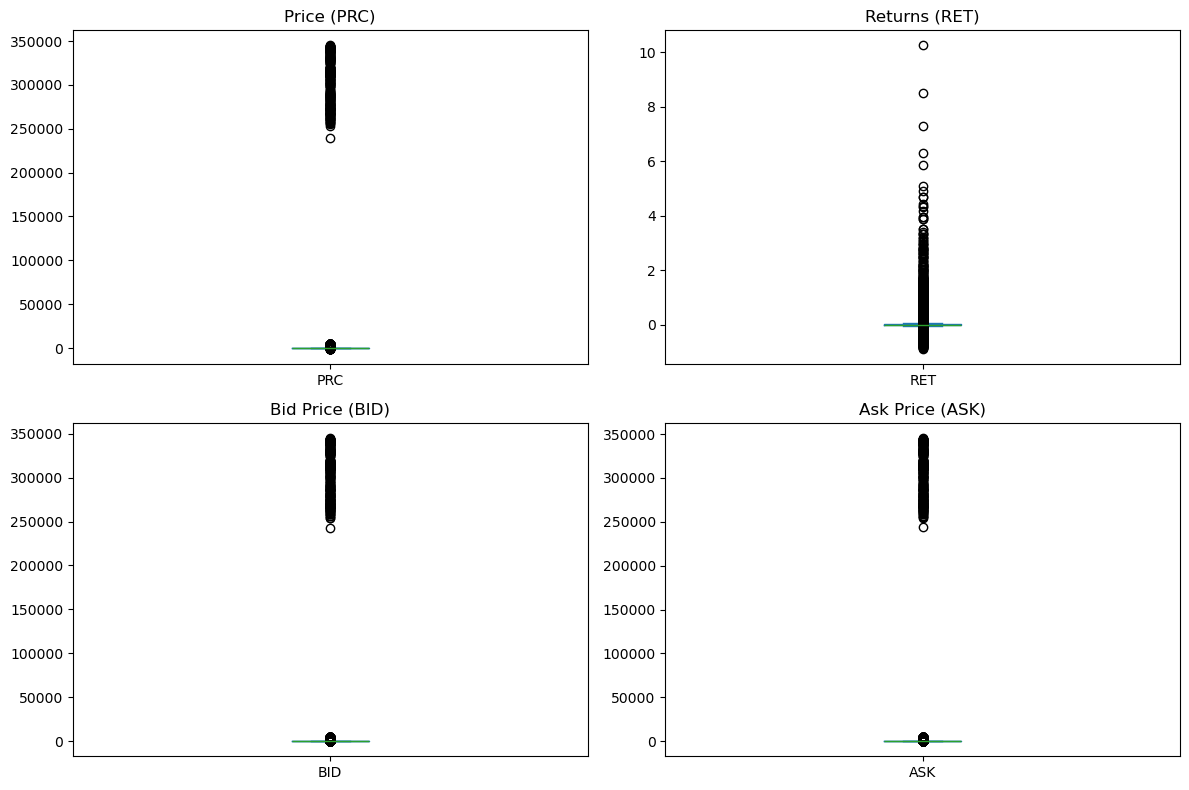

In [15]:
import matplotlib.pyplot as plt

# Visual check for outliers using boxplots
plt.figure(figsize=(12, 8))

# Subplot for Price
plt.subplot(2, 2, 1)
stock_data_1_cleaned['PRC'].plot.box(showfliers=True)
plt.title('Price (PRC)')

# Subplot for Returns
plt.subplot(2, 2, 2)
stock_data_1_cleaned['RET'].plot.box(showfliers=True)
plt.title('Returns (RET)')

# Subplot for Bid Price
plt.subplot(2, 2, 3)
stock_data_1_cleaned['BID'].plot.box(showfliers=True)
plt.title('Bid Price (BID)')

# Subplot for Ask Price
plt.subplot(2, 2, 4)
stock_data_1_cleaned['ASK'].plot.box(showfliers=True)
plt.title('Ask Price (ASK)')

plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt

# Define the directory where you want to save the plots
output_dir = '/Users/rohanpadaya/Desktop/pankit_assign/EDA_Plots/'  # Modify this path as needed

# Ensure the directory exists
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to save boxplots
def save_boxplot(column_name, data, output_dir):
    plt.figure(figsize=(8, 6))
    data[column_name].plot.box(showfliers=True)
    plt.title(f'{column_name} Boxplot')
    plt.savefig(f'{output_dir}{column_name}_boxplot.png')
    plt.close()

# Generate and save boxplots for each key variable
save_boxplot('PRC', stock_data_1_cleaned, output_dir)
save_boxplot('RET', stock_data_1_cleaned, output_dir)
save_boxplot('BID', stock_data_1_cleaned, output_dir)
save_boxplot('ASK', stock_data_1_cleaned, output_dir)

print(f"Boxplots saved to {output_dir}")


Boxplots saved to /Users/rohanpadaya/Desktop/pankit_assign/EDA_Plots/


In [18]:
# Identify securities with extreme prices
high_price_securities = stock_data_1_cleaned[stock_data_1_cleaned['PRC'] > stock_data_1_cleaned['PRC'].quantile(0.99)]
high_price_tickers = high_price_securities['TICKER'].unique()

# Display these tickers and their characteristics
print("Securities with High Prices:")
print(high_price_securities[['TICKER', 'PRC', 'VOL', 'BID', 'ASK']])


Securities with High Prices:
        TICKER         PRC         VOL         BID         ASK
7482      DJCO   280.70999      6038.0   277.45001   282.50000
7483      DJCO   286.98999      4505.0   284.20001   290.00000
7484      DJCO   286.14001      3462.0   283.00000   289.39001
7485      DJCO   286.73001      1874.0   284.00000   289.39999
7486      DJCO   287.73999      1553.0   286.00000   289.23999
...        ...         ...         ...         ...         ...
1938796   TSLA  1650.70996  12562182.0  1650.81006  1651.50000
1938797   TSLA  1835.64001  20145252.0  1835.14001  1835.93005
1938798   TSLA  1887.08997  16436978.0  1887.00000  1887.94995
1938799   TSLA  1878.53003  12178422.0  1879.00000  1880.40002
1938800   TSLA  2001.82996  20557219.0  2000.05005  2002.30005

[19267 rows x 5 columns]


In [19]:
# Identify all securities in the top 1% of PRC
high_price_securities = stock_data_1_cleaned[stock_data_1_cleaned['PRC'] > stock_data_1_cleaned['PRC'].quantile(0.90)]

# Display unique tickers and their counts in the top 1% price range
high_price_summary = high_price_securities['TICKER'].value_counts()
print("Summary of Securities in the Top 1% Price Range:")
print(high_price_summary)


Summary of Securities in the Top 1% Price Range:
TICKER
BRK     508
MKC     476
STZ     398
HEI     385
BH      382
       ... 
NXTC      1
KMPR      1
IRET      1
DIT       1
MSGE      1
Name: count, Length: 1069, dtype: int64


# High vs low priced Securities EDA

In [20]:
# Filter high-priced securities (top 1% of PRC)
high_priced_data = stock_data_1_cleaned[stock_data_1_cleaned['TICKER'].isin(high_price_summary.index)]

# Filter normal-priced securities (remaining 99%)
normal_priced_data = stock_data_1_cleaned[~stock_data_1_cleaned['TICKER'].isin(high_price_summary.index)]


In [21]:
high_priced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268255 entries, 0 to 1938800
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PERMNO  268255 non-null  int64         
 1   date    268255 non-null  datetime64[ns]
 2   SHRCD   268255 non-null  float64       
 3   TICKER  268255 non-null  object        
 4   COMNAM  268255 non-null  object        
 5   PERMCO  268255 non-null  int64         
 6   BIDLO   268255 non-null  float64       
 7   ASKHI   268255 non-null  float64       
 8   PRC     268255 non-null  float64       
 9   VOL     268255 non-null  float64       
 10  RET     268255 non-null  float64       
 11  BID     268255 non-null  float64       
 12  ASK     268255 non-null  float64       
 13  SHROUT  268255 non-null  float64       
 14  sprtrn  268255 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 32.7+ MB


In [22]:
normal_priced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1658483 entries, 254 to 1938546
Data columns (total 15 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   PERMNO  1658483 non-null  int64         
 1   date    1658483 non-null  datetime64[ns]
 2   SHRCD   1658483 non-null  float64       
 3   TICKER  1658483 non-null  object        
 4   COMNAM  1658483 non-null  object        
 5   PERMCO  1658483 non-null  int64         
 6   BIDLO   1658483 non-null  float64       
 7   ASKHI   1658483 non-null  float64       
 8   PRC     1658483 non-null  float64       
 9   VOL     1658483 non-null  float64       
 10  RET     1658483 non-null  float64       
 11  BID     1658483 non-null  float64       
 12  ASK     1658483 non-null  float64       
 13  SHROUT  1658483 non-null  float64       
 14  sprtrn  1658483 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 202.5+ MB


In [23]:
# Define the price range around 350k
lower_bound = 340000  # Lower bound of the price range
upper_bound = 360000  # Upper bound of the price range

# Filter the dataset for securities within this price range
securities_around_350k = stock_data_1_cleaned[(stock_data_1_cleaned['PRC'] >= lower_bound) & 
                                              (stock_data_1_cleaned['PRC'] <= upper_bound)]

# Print the securities that fall within this price range
print("Securities with Prices Around 350k:")
print(securities_around_350k[['TICKER', 'PRC', 'VOL', 'BID', 'ASK']])


Securities with Prices Around 350k:
       TICKER           PRC    VOL           BID           ASK
747715    BRK  340380.00000  324.0  340100.00000  340380.00000
747726    BRK  342261.00000  408.0  342335.00000  342500.00000
747728    BRK  340210.00000  275.0  340415.00000  340705.00000
747731    BRK  343263.00000  278.0  342830.00000  343000.00000
747732    BRK  340185.00000  144.0  340000.00000  340185.31250
747733    BRK  342855.00000  205.0  342500.00000  342855.00000
747734    BRK  340706.00000  162.0  340550.00000  340725.00000
747735    BRK  342550.00000  125.0  342236.00000  342550.00000
747736    BRK  344505.00000  204.0  344531.00000  345000.00000
747737    BRK  344970.00000  229.0  345140.00000  345589.00000
747738    BRK  342650.00000  277.0  342650.00000  343035.00000
747739    BRK  344700.00000  244.0  344315.00000  344640.00000
747740    BRK  344414.00000  200.0  343800.00000  344175.00000
747741    BRK  340199.09375  294.0  340199.00000  340515.00000
747745    BRK  3420

In [24]:
# Define the COVID-19 and Non-COVID periods
covid_start = '2020-02-14'
covid_end = '2020-03-20'
non_covid_start = '2019-02-14'
non_covid_end = '2019-03-20'

# Filter data for these periods for high-priced securities
covid_high_priced = high_priced_data[(high_priced_data['date'] >= covid_start) & (high_priced_data['date'] <= covid_end)]
non_covid_high_priced = high_priced_data[(high_priced_data['date'] >= non_covid_start) & (high_priced_data['date'] <= non_covid_end)]

# Filter data for these periods for normal-priced securities
covid_normal_priced = normal_priced_data[(normal_priced_data['date'] >= covid_start) & (normal_priced_data['date'] <= covid_end)]
non_covid_normal_priced = normal_priced_data[(normal_priced_data['date'] >= non_covid_start) & (normal_priced_data['date'] <= non_covid_end)]


In [25]:
print(covid_high_priced.shape)
print(non_covid_high_priced.shape)

(26461, 15)
(0, 15)


In [26]:
print(covid_normal_priced.shape)
print(non_covid_normal_priced.shape)

(162940, 15)
(0, 15)


In [27]:
# Check the minimum and maximum dates in the dataset
print("Date range in the dataset:")
print("Min date:", stock_data_1_cleaned['date'].min())
print("Max date:", stock_data_1_cleaned['date'].max())


Date range in the dataset:
Min date: 2019-08-20 00:00:00
Max date: 2020-08-20 00:00:00


In [73]:
# Adjusted Non-COVID Period within the available date range
non_covid_start = '2019-11-01'
non_covid_end = '2019-12-01'

# Filter data for the adjusted non-COVID period
non_covid_high_priced = high_priced_data[(high_priced_data['date'] >= non_covid_start) & 
                                         (high_priced_data['date'] <= non_covid_end)]

non_covid_normal_priced = normal_priced_data[(normal_priced_data['date'] >= non_covid_start) & 
                                             (normal_priced_data['date'] <= non_covid_end)]

# Check the shape to confirm data availability
print(non_covid_high_priced.shape)
print(non_covid_normal_priced.shape)


(21209, 15)
(130709, 15)


In [74]:
def descriptive_stats(data, name):
    stats = data[['PRC', 'RET', 'VOL', 'BID', 'ASK']].describe(percentiles=[.25, .5, .75])
    print(f"Descriptive Statistics for {name} period:")
    print(stats)
    return stats

# High-Priced Securities
print("High-Priced Securities:")
covid_high_priced_stats = descriptive_stats(covid_high_priced, "COVID-19 (High-Priced)")
non_covid_high_priced_stats = descriptive_stats(non_covid_high_priced, "Non-COVID-19 (High-Priced)")

# Normal-Priced Securities
print("\nNormal-Priced Securities:")
covid_normal_priced_stats = descriptive_stats(covid_normal_priced, "COVID-19 (Normal-Priced)")
non_covid_normal_priced_stats = descriptive_stats(non_covid_normal_priced, "Non-COVID-19 (Normal-Priced)")


High-Priced Securities:
Descriptive Statistics for COVID-19 (High-Priced) period:
                 PRC           RET           VOL            BID            ASK
count   26461.000000  26461.000000  2.646100e+04   26461.000000   26461.000000
mean      431.227535     -0.014827  2.804853e+06     432.388561     433.410134
std      9472.492119      0.065984  1.075067e+07    9472.389503    9493.744770
min      -652.530030     -0.661876  0.000000e+00       1.280000       1.290000
25%        77.200000     -0.041792  1.875250e+05      77.360000      77.530000
50%       101.720000     -0.010229  7.284270e+05     101.890000     101.970000
75%       148.280000      0.011924  2.136072e+06     148.720000     148.990010
max    344000.000000      0.987335  3.922207e+08  343940.000000  344130.000000
Descriptive Statistics for Non-COVID-19 (High-Priced) period:
                 PRC           RET           VOL            BID            ASK
count   21209.000000  21209.000000  2.120900e+04   21209.000000   

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

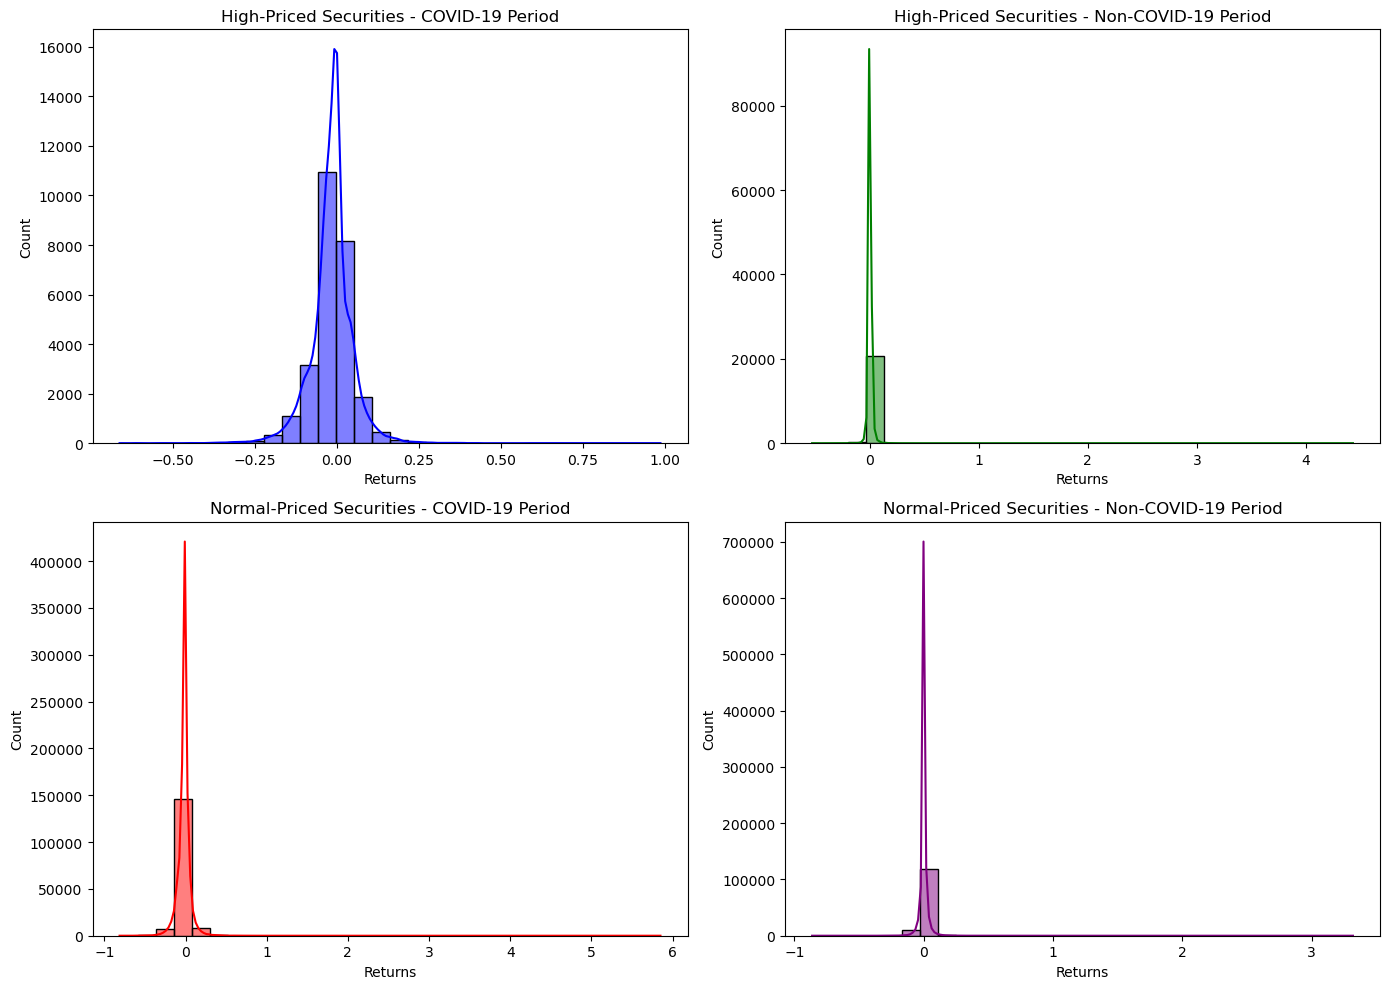

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 10))

# High-Priced Securities - COVID-19
plt.subplot(2, 2, 1)
sns.histplot(covid_high_priced['RET'], kde=True, bins=30, color='blue')
plt.title('High-Priced Securities - COVID-19 Period')
plt.xlabel('Returns')

# High-Priced Securities - Non-COVID-19
plt.subplot(2, 2, 2)
sns.histplot(non_covid_high_priced['RET'], kde=True, bins=30, color='green')
plt.title('High-Priced Securities - Non-COVID-19 Period')
plt.xlabel('Returns')

# Normal-Priced Securities - COVID-19
plt.subplot(2, 2, 3)
sns.histplot(covid_normal_priced['RET'], kde=True, bins=30, color='red')
plt.title('Normal-Priced Securities - COVID-19 Period')
plt.xlabel('Returns')

# Normal-Priced Securities - Non-COVID-19
plt.subplot(2, 2, 4)
sns.histplot(non_covid_normal_priced['RET'], kde=True, bins=30, color='purple')
plt.title('Normal-Priced Securities - Non-COVID-19 Period')
plt.xlabel('Returns')

plt.tight_layout()
plt.show()


In [76]:
# Save the distribution plots
def save_distribution_plot(data, title, filename, color):
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True, bins=30, color=color)
    plt.title(title)
    plt.xlabel('Returns')
    plt.savefig(filename)
    plt.close()

# Save distribution plots for returns
save_distribution_plot(covid_high_priced['RET'], 'High-Priced Securities - COVID-19 Period', '/Users/rohanpadaya/Desktop/pankit_assign/High_Priced_COVID_RET.png', 'blue')
save_distribution_plot(non_covid_high_priced['RET'], 'High-Priced Securities - Non-COVID-19 Period', '/Users/rohanpadaya/Desktop/pankit_assign/High_Priced_NonCOVID_RET.png', 'green')
save_distribution_plot(covid_normal_priced['RET'], 'Normal-Priced Securities - COVID-19 Period', '/Users/rohanpadaya/Desktop/pankit_assign/Normal_Priced_COVID_RET.png', 'red')
save_distribution_plot(non_covid_normal_priced['RET'], 'Normal-Priced Securities - Non-COVID-19 Period', '/Users/rohanpadaya/Desktop/pankit_assign/Normal_Priced_NonCOVID_RET.png', 'purple')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

In [77]:
# Prepare data
average_returns = {
    "High-Priced (COVID-19)": covid_high_priced['RET'].mean(),
    "High-Priced (Non-COVID-19)": non_covid_high_priced['RET'].mean(),
    "Normal-Priced (COVID-19)": covid_normal_priced['RET'].mean(),
    "Normal-Priced (Non-COVID-19)": non_covid_normal_priced['RET'].mean()
}

# Plotting and saving
plt.figure(figsize=(10, 6))
plt.bar(average_returns.keys(), average_returns.values(), color=['blue', 'green', 'red', 'purple'])
plt.title("Average Returns During COVID-19 and Non-COVID Periods")
plt.ylabel("Average Return")
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/Average_Returns.png')
plt.close()


In [78]:
print(average_returns)


{'High-Priced (COVID-19)': -0.014827297343259892, 'High-Priced (Non-COVID-19)': 0.0025852518270545522, 'Normal-Priced (COVID-19)': -0.015833668644899965, 'Normal-Priced (Non-COVID-19)': 0.0011016389690074898}


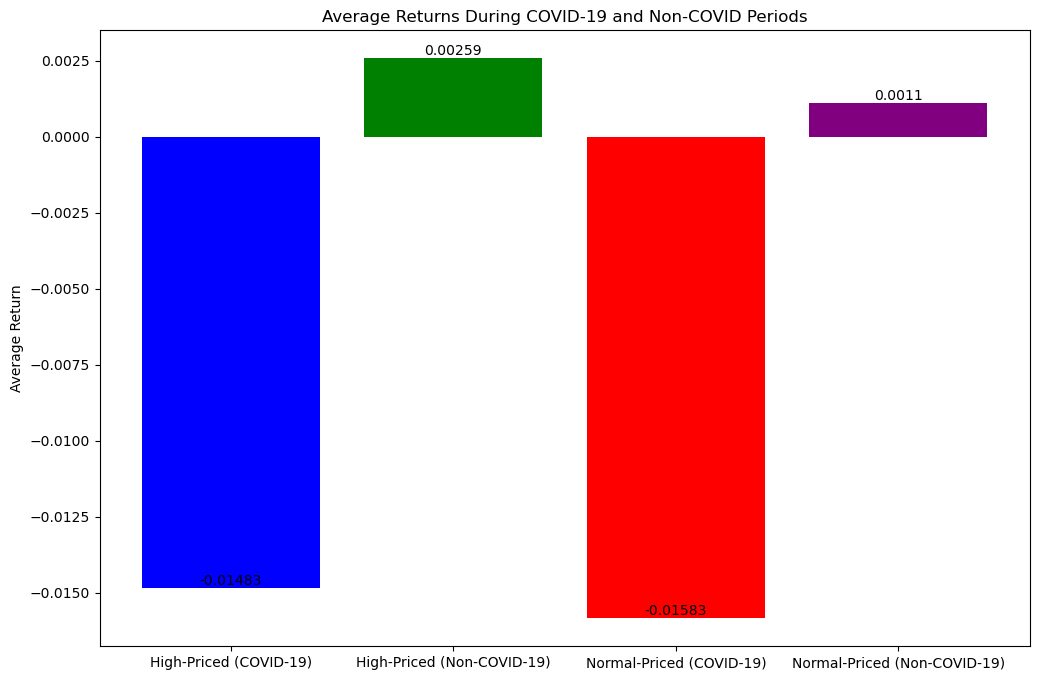

In [118]:
plt.figure(figsize=(12, 8))
bars = plt.bar(average_returns.keys(), average_returns.values(), color=['blue', 'green', 'red', 'purple'])
plt.title("Average Returns During COVID-19 and Non-COVID Periods")
plt.ylabel("Average Return")

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/Average_Returns_Annotated.png')
plt.show()


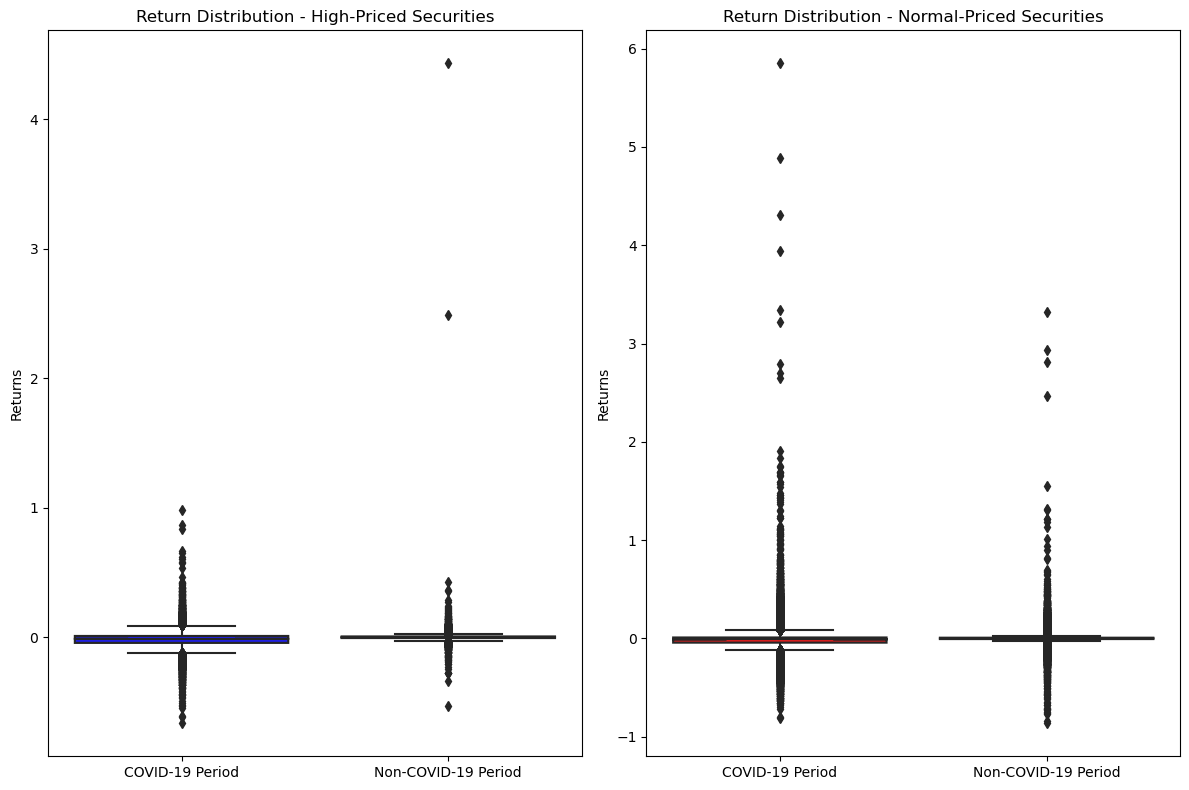

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and Save Box Plots for Returns
plt.figure(figsize=(12, 8))

# High-Priced Securities
plt.subplot(1, 2, 1)
sns.boxplot(data=[covid_high_priced['RET'], non_covid_high_priced['RET']], 
            palette=["blue", "green"], notch=True)
plt.xticks([0, 1], ['COVID-19 Period', 'Non-COVID-19 Period'])
plt.title("Return Distribution - High-Priced Securities")
plt.ylabel("Returns")

# Normal-Priced Securities
plt.subplot(1, 2, 2)
sns.boxplot(data=[covid_normal_priced['RET'], non_covid_normal_priced['RET']], 
            palette=["red", "purple"], notch=True)
plt.xticks([0, 1], ['COVID-19 Period', 'Non-COVID-19 Period'])
plt.title("Return Distribution - Normal-Priced Securities")
plt.ylabel("Returns")

plt.tight_layout()
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/Return_Distribution_Boxplot.png')
plt.show()  # Display the plot


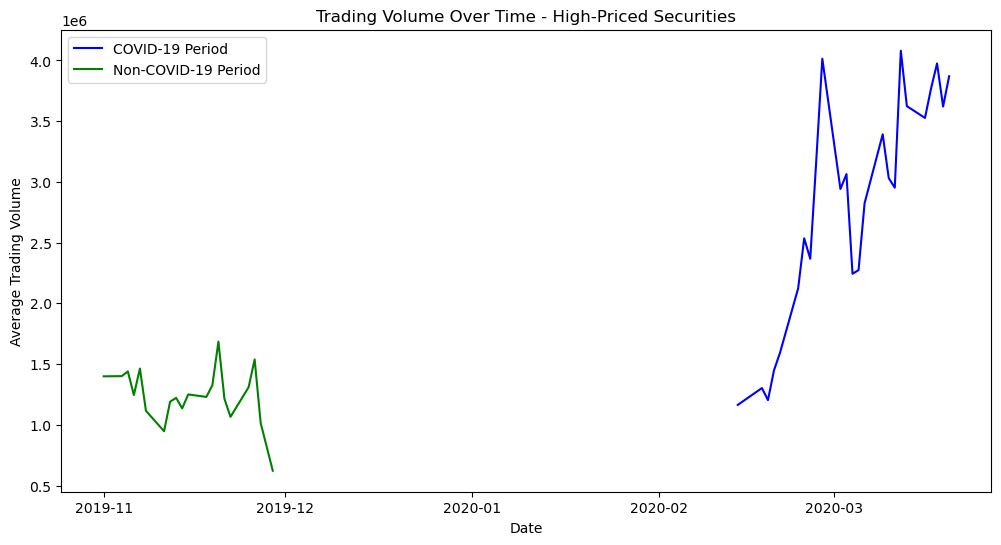

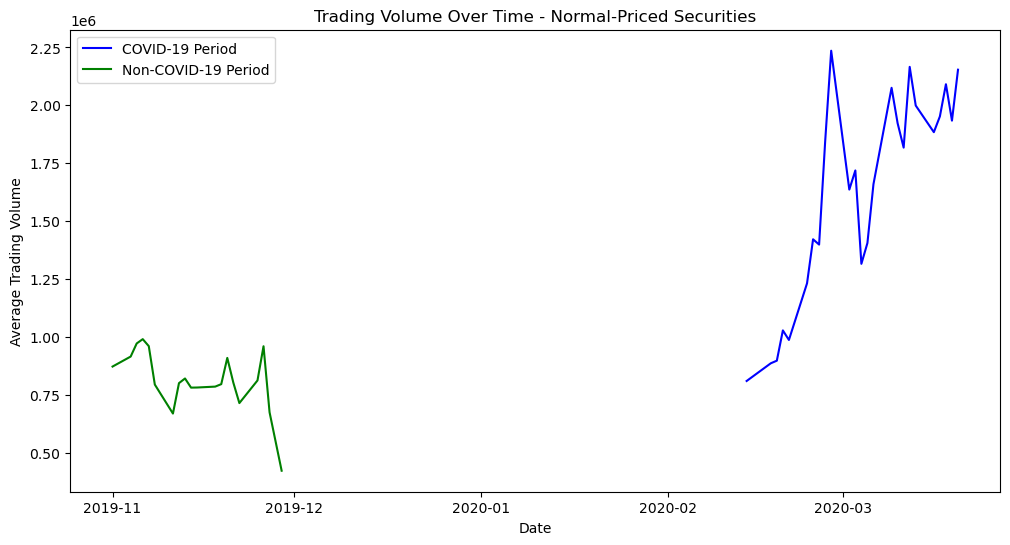

In [121]:
def plot_trading_volume(covid_data, non_covid_data, title, filename):
    plt.figure(figsize=(12, 6))
    avg_vol_covid = covid_data.groupby('date')['VOL'].mean()
    avg_vol_non_covid = non_covid_data.groupby('date')['VOL'].mean()
    
    plt.plot(avg_vol_covid.index, avg_vol_covid, label='COVID-19 Period', color='blue')
    plt.plot(avg_vol_non_covid.index, avg_vol_non_covid, label='Non-COVID-19 Period', color='green')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Average Trading Volume")
    plt.legend()
    plt.savefig(filename)
    plt.show()  # Display the plot

# High-Priced Securities
plot_trading_volume(covid_high_priced, non_covid_high_priced, 
                    "Trading Volume Over Time - High-Priced Securities", 
                    '/Users/rohanpadaya/Desktop/pankit_assign/Trading_Volume_High_Priced.png')

# Normal-Priced Securities
plot_trading_volume(covid_normal_priced, non_covid_normal_priced, 
                    "Trading Volume Over Time - Normal-Priced Securities", 
                    '/Users/rohanpadaya/Desktop/pankit_assign/Trading_Volume_Normal_Priced.png')


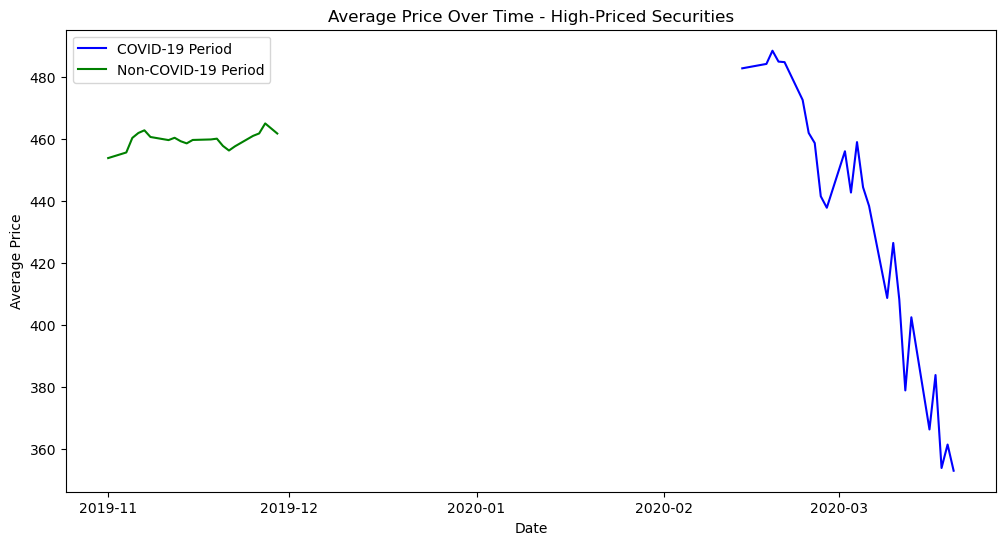

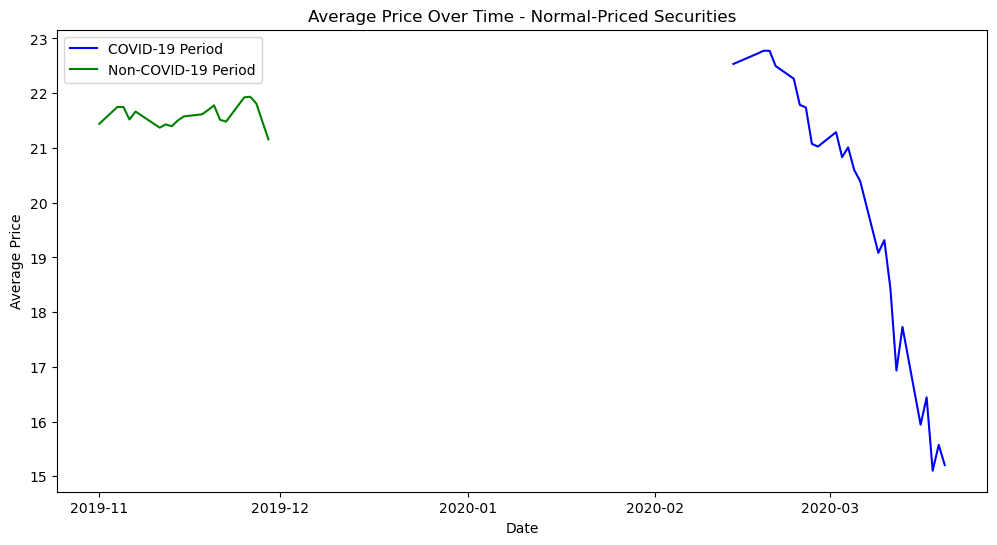

In [82]:
def plot_avg_prices(covid_data, non_covid_data, title, filename):
    plt.figure(figsize=(12, 6))
    avg_price_covid = covid_data.groupby('date')['PRC'].mean()
    avg_price_non_covid = non_covid_data.groupby('date')['PRC'].mean()
    
    plt.plot(avg_price_covid.index, avg_price_covid, label='COVID-19 Period', color='blue')
    plt.plot(avg_price_non_covid.index, avg_price_non_covid, label='Non-COVID-19 Period', color='green')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Average Price")
    plt.legend()
    plt.savefig(filename)
    plt.show()  # Display the plot

# High-Priced Securities
plot_avg_prices(covid_high_priced, non_covid_high_priced, 
                "Average Price Over Time - High-Priced Securities", 
                '/Users/rohanpadaya/Desktop/pankit_assign/Average_Price_High_Priced.png')

# Normal-Priced Securities
plot_avg_prices(covid_normal_priced, non_covid_normal_priced, 
                "Average Price Over Time - Normal-Priced Securities", 
                '/Users/rohanpadaya/Desktop/pankit_assign/Average_Price_Normal_Priced.png')


In [83]:
import pandas as pd

# Function to create descriptive statistics table
def create_descriptive_stats_table(data, variables, period_name):
    stats = data[variables].describe(percentiles=[.25, .5, .75]).T
    stats['period'] = period_name
    return stats

# Variables of interest
variables = ['PRC', 'RET', 'VOL', 'BID', 'ASK']

# Descriptive Statistics for High-Priced Securities
covid_high_stats = create_descriptive_stats_table(covid_high_priced, variables, 'COVID-19')
non_covid_high_stats = create_descriptive_stats_table(non_covid_high_priced, variables, 'Non-COVID-19')

# Descriptive Statistics for Normal-Priced Securities
covid_normal_stats = create_descriptive_stats_table(covid_normal_priced, variables, 'COVID-19')
non_covid_normal_stats = create_descriptive_stats_table(non_covid_normal_priced, variables, 'Non-COVID-19')

# Combine all stats into one table
descriptive_stats_table = pd.concat([covid_high_stats, non_covid_high_stats, covid_normal_stats, non_covid_normal_stats])
descriptive_stats_table = descriptive_stats_table[['period', 'mean', '50%', 'std', 'min', '25%', '75%', 'max']]
descriptive_stats_table.columns = ['Period', 'Mean', 'Median', 'Standard Deviation', 'Min', '25th Percentile', '75th Percentile', 'Max']

# Display the descriptive statistics table directly in the notebook
print(descriptive_stats_table)


           Period          Mean         Median  Standard Deviation  \
PRC      COVID-19  4.312275e+02     101.720000        9.472492e+03   
RET      COVID-19 -1.482730e-02      -0.010229        6.598362e-02   
VOL      COVID-19  2.804853e+06  728427.000000        1.075067e+07   
BID      COVID-19  4.323886e+02     101.890000        9.472390e+03   
ASK      COVID-19  4.334101e+02     101.970000        9.493745e+03   
PRC  Non-COVID-19  4.597083e+02     109.950000        1.010364e+04   
RET  Non-COVID-19  2.585252e-03       0.001253        3.999130e-02   
VOL  Non-COVID-19  1.240725e+06  380377.000000        3.797553e+06   
BID  Non-COVID-19  4.613346e+02     110.260000        1.010207e+04   
ASK  Non-COVID-19  4.618383e+02     110.340000        1.011270e+04   
PRC      COVID-19  1.980193e+01      16.218750        1.771614e+01   
RET      COVID-19 -1.583367e-02      -0.008885        8.402421e-02   
VOL      COVID-19  1.619032e+06  164184.000000        6.742735e+06   
BID      COVID-19  2

In [84]:
import pandas as pd

# Ensure the descriptive_stats_table contains the appropriate indexing
# Filter by variable and reset the index correctly

# Function to create descriptive stats tables for a given variable
def create_variable_table(descriptive_stats_table, variable):
    # Filter the table for the specific variable
    var_table = descriptive_stats_table.loc[variable].reset_index(drop=True)
    # Set the correct index
    var_table.index = ['COVID-19 (High-Priced)', 'Non-COVID-19 (High-Priced)', 'COVID-19 (Normal-Priced)', 'Non-COVID-19 (Normal-Priced)']
    # Transpose the table for better readability
    var_table = var_table.T
    return var_table

# Loop through each variable and display the table
variables = ['PRC', 'RET', 'VOL', 'BID', 'ASK']

for var in variables:
    var_table = create_variable_table(descriptive_stats_table, var)
    print(f"Descriptive Statistics for {var}:")
    print(var_table)
    print("\n")

# Save the tables to CSV for further use
descriptive_stats_table.to_csv('/Users/rohanpadaya/Desktop/pankit_assign/descriptive_stats_table_detailed.csv', index=False)


Descriptive Statistics for PRC:
                   COVID-19 (High-Priced) Non-COVID-19 (High-Priced)  \
Period                           COVID-19               Non-COVID-19   
Mean                           431.227535                 459.708278   
Median                             101.72                     109.95   
Standard Deviation            9472.492119               10103.643156   
Min                            -652.53003                 -588.59998   
25th Percentile                      77.2                      85.04   
75th Percentile                    148.28                  157.74001   
Max                              344000.0                   333860.0   

                   COVID-19 (Normal-Priced) Non-COVID-19 (Normal-Priced)  
Period                             COVID-19                 Non-COVID-19  
Mean                              19.801931                    21.594953  
Median                             16.21875                        18.38  
Standard Deviation 

## Task 2- OLS Regression

In [85]:
stock_data_1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1926738 entries, 0 to 1938800
Data columns (total 15 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PERMNO  int64         
 1   date    datetime64[ns]
 2   SHRCD   float64       
 3   TICKER  object        
 4   COMNAM  object        
 5   PERMCO  int64         
 6   BIDLO   float64       
 7   ASKHI   float64       
 8   PRC     float64       
 9   VOL     float64       
 10  RET     float64       
 11  BID     float64       
 12  ASK     float64       
 13  SHROUT  float64       
 14  sprtrn  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 235.2+ MB


In [86]:
import pandas as pd

# Use stock_data_1_cleaned for Task 2
cleaned_data = stock_data_1_cleaned

# Define the periods
covid_period_start = '2020-02-14'
covid_period_end = '2020-03-20'
non_covid_period_start = '2019-08-20'  
non_covid_period_end = '2019-09-20'

# Function to compute cumulative returns over a period
def compute_cumulative_return(data, start_date, end_date):
    period_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    cumulative_return = period_data.groupby('PERMNO')['RET'].apply(lambda x: (1 + x).prod() - 1)
    return cumulative_return

# Compute returns for COVID and Non-COVID periods
covid_returns = compute_cumulative_return(cleaned_data, covid_period_start, covid_period_end)
non_covid_returns = compute_cumulative_return(cleaned_data, non_covid_period_start, non_covid_period_end)

# Ensure that both return Series have the same index
covid_returns = covid_returns[covid_returns.index.isin(non_covid_returns.index)]
non_covid_returns = non_covid_returns[non_covid_returns.index.isin(covid_returns.index)]

# Merge these returns into a single DataFrame
returns_df = pd.DataFrame({
    'PERMNO': covid_returns.index,
    'COVID_Return': covid_returns.values,
    'Non_COVID_Return': non_covid_returns.values
})

# Select only numeric columns before calculating means
numeric_columns = cleaned_data.select_dtypes(include=[float, int])

# Calculate average explanatory variables for both periods using the cleaned data
covid_explanatory = numeric_columns[(cleaned_data['date'] >= covid_period_start) & (cleaned_data['date'] <= covid_period_end)].groupby('PERMNO').mean()
non_covid_explanatory = numeric_columns[(cleaned_data['date'] >= non_covid_period_start) & (cleaned_data['date'] <= non_covid_period_end)].groupby('PERMNO').mean()

# Merge with the return DataFrame
covid_data = returns_df.merge(covid_explanatory, on='PERMNO', how='left', suffixes=('_COVID', ''))
non_covid_data = returns_df.merge(non_covid_explanatory, on='PERMNO', how='left', suffixes=('_NonCOVID', ''))

# Display the head of both datasets to ensure everything is correct
print("COVID Period Data Head:")
print(covid_data.head())
print("\nNon-COVID Period Data Head:")
print(non_covid_data.head())

# Save the dataframes if needed
covid_data.to_csv('/Users/rohanpadaya/Desktop/pankit_assign/covid_data_cleaned.csv', index=False)
non_covid_data.to_csv('/Users/rohanpadaya/Desktop/pankit_assign/non_covid_data_cleaned.csv', index=False)


COVID Period Data Head:
   PERMNO  COVID_Return  Non_COVID_Return  SHRCD  PERMCO       BIDLO  \
0   10026     -0.280867         -0.015127   11.0  7976.0  150.342655   
1   10028      0.048427          0.231579   11.0  7978.0    2.520144   
2   10032     -0.427277          0.065212   11.0  7980.0   60.479648   
3   10044     -0.539688          0.054840   11.0  7992.0    7.255412   
4   10051     -0.463254          0.122458   11.0  7999.0   20.215920   

        ASKHI         PRC        VOL       RET       BID       ASK   SHROUT  \
0  157.420400  153.722801  154145.88 -0.011360  153.4228  153.8056  18919.0   
1    2.908884    2.721860  247886.32  0.005040    2.7036    2.7364  26924.0   
2   64.302800   61.957600  193881.28 -0.019754   61.8360   62.0160  29355.0   
3    7.840012    7.436680   15951.92 -0.028171    7.3748    7.5848   6041.6   
4   21.503100   20.737600  290968.16 -0.022093   20.7072   20.7424  37338.0   

     sprtrn  
0 -0.013983  
1 -0.013983  
2 -0.013983  
3 -0.013983 

In [87]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERMNO            7369 non-null   int64  
 1   COVID_Return      7369 non-null   float64
 2   Non_COVID_Return  7369 non-null   float64
 3   SHRCD             7369 non-null   float64
 4   PERMCO            7369 non-null   float64
 5   BIDLO             7369 non-null   float64
 6   ASKHI             7369 non-null   float64
 7   PRC               7369 non-null   float64
 8   VOL               7369 non-null   float64
 9   RET               7369 non-null   float64
 10  BID               7369 non-null   float64
 11  ASK               7369 non-null   float64
 12  SHROUT            7369 non-null   float64
 13  sprtrn            7369 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 806.1 KB


In [88]:
non_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PERMNO            7369 non-null   int64  
 1   COVID_Return      7369 non-null   float64
 2   Non_COVID_Return  7369 non-null   float64
 3   SHRCD             7369 non-null   float64
 4   PERMCO            7369 non-null   float64
 5   BIDLO             7369 non-null   float64
 6   ASKHI             7369 non-null   float64
 7   PRC               7369 non-null   float64
 8   VOL               7369 non-null   float64
 9   RET               7369 non-null   float64
 10  BID               7369 non-null   float64
 11  ASK               7369 non-null   float64
 12  SHROUT            7369 non-null   float64
 13  sprtrn            7369 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 806.1 KB


# Implementing the OLS model

## Data Splitting (80/20)

In [89]:
from sklearn.model_selection import train_test_split

# Assuming covid_data and non_covid_data contain both predictor and target variables
# Define the predictor variables (X) and target variables (y) for both periods

X_covid = covid_data.drop(columns=['COVID_Return', 'Non_COVID_Return'])
y_covid = covid_data['COVID_Return']

X_non_covid = non_covid_data.drop(columns=['COVID_Return', 'Non_COVID_Return'])
y_non_covid = non_covid_data['Non_COVID_Return']

# Split the data into training and testing sets
X_covid_train, X_covid_test, y_covid_train, y_covid_test = train_test_split(X_covid, y_covid, test_size=0.2, random_state=42)
X_non_covid_train, X_non_covid_test, y_non_covid_train, y_non_covid_test = train_test_split(X_non_covid, y_non_covid, test_size=0.2, random_state=42)

# Confirming the shape of the splits
print(f"COVID Period Training Data Shape: {X_covid_train.shape}, {y_covid_train.shape}")
print(f"COVID Period Testing Data Shape: {X_covid_test.shape}, {y_covid_test.shape}")
print(f"Non-COVID Period Training Data Shape: {X_non_covid_train.shape}, {y_non_covid_train.shape}")
print(f"Non-COVID Period Testing Data Shape: {X_non_covid_test.shape}, {y_non_covid_test.shape}")


COVID Period Training Data Shape: (5895, 12), (5895,)
COVID Period Testing Data Shape: (1474, 12), (1474,)
Non-COVID Period Training Data Shape: (5895, 12), (5895,)
Non-COVID Period Testing Data Shape: (1474, 12), (1474,)


In [90]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define a function to fit the model and evaluate it
def fit_and_evaluate_ols_model(X_train, y_train, X_test, y_test):
    # Add a constant (intercept) to the model
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    # Fit the OLS model
    model = sm.OLS(y_train, X_train_const).fit()
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_const)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the summary and evaluation metrics
    print(model.summary())
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R-squared: {r2}')
    
    return model, y_pred

# Fit and evaluate the model for the COVID period
print("COVID Period OLS Model:")
covid_model, covid_y_pred = fit_and_evaluate_ols_model(X_covid_train, y_covid_train, X_covid_test, y_covid_test)

# Fit and evaluate the model for the non-COVID period
print("\nNon-COVID Period OLS Model:")
non_covid_model, non_covid_y_pred = fit_and_evaluate_ols_model(X_non_covid_train, y_non_covid_train, X_non_covid_test, y_non_covid_test)


COVID Period OLS Model:
                            OLS Regression Results                            
Dep. Variable:           COVID_Return   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1538.
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:46:34   Log-Likelihood:                 2872.4
No. Observations:                5895   AIC:                            -5719.
Df Residuals:                    5882   BIC:                            -5632.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0

## Visualizing the model results

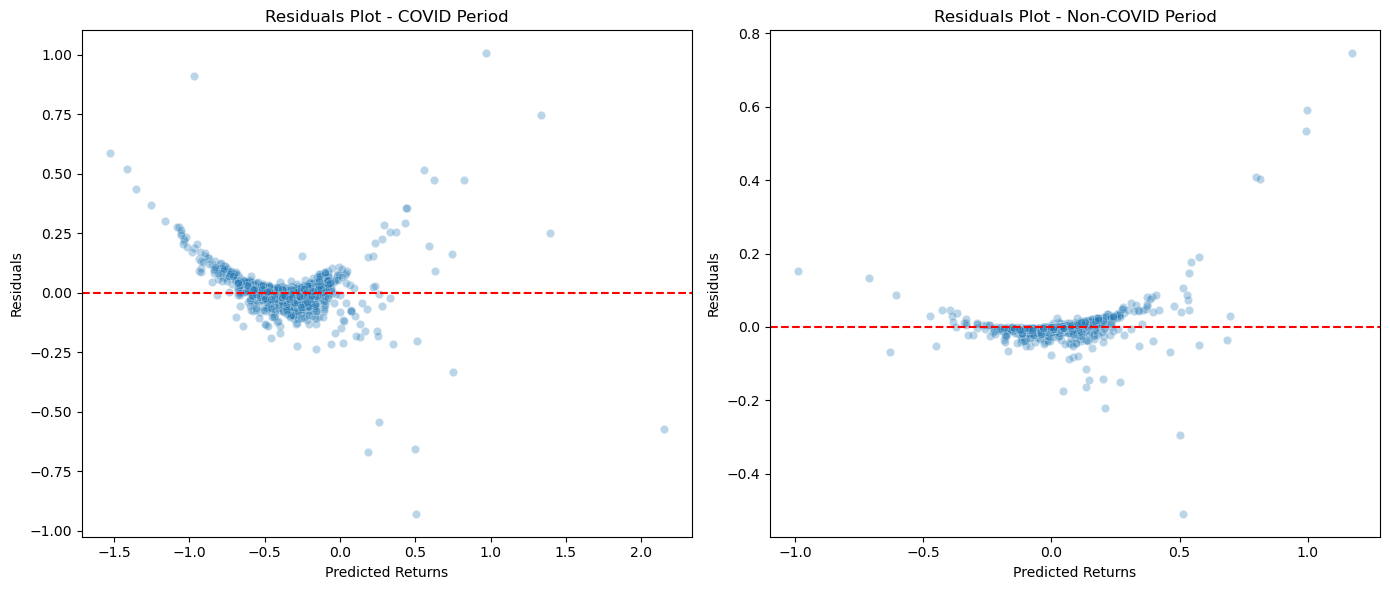

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals for COVID and Non-COVID Periods
residuals_covid = y_covid_test - covid_y_pred
residuals_non_covid = y_non_covid_test - non_covid_y_pred

# Residual Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=covid_y_pred, y=residuals_covid, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot - COVID Period')
plt.xlabel('Predicted Returns')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=non_covid_y_pred, y=residuals_non_covid, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot - Non-COVID Period')
plt.xlabel('Predicted Returns')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('/Users/rohanpadaya/Desktop/pankit_assign/Residual_Plots_Comparison.png')
plt.show()


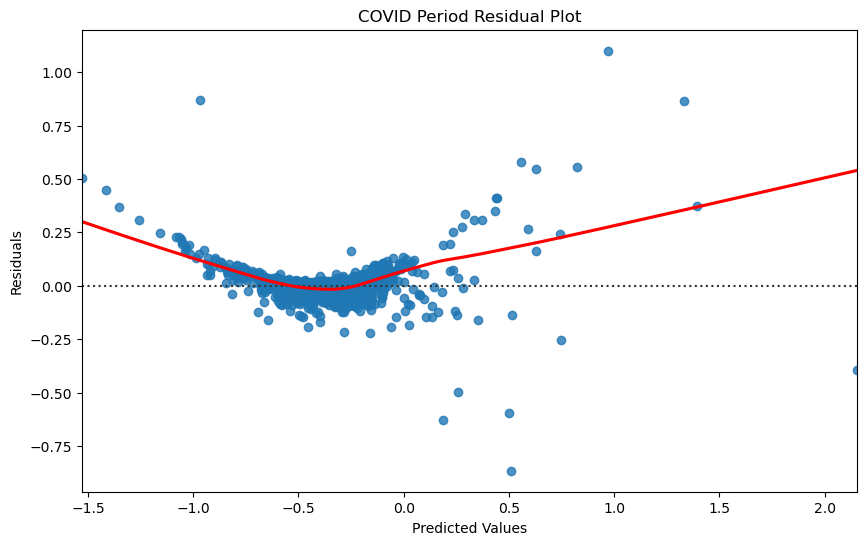

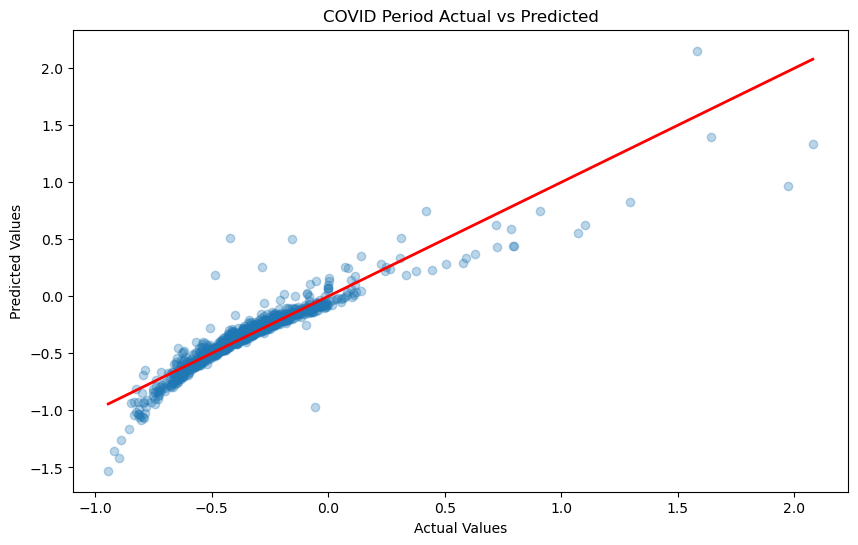

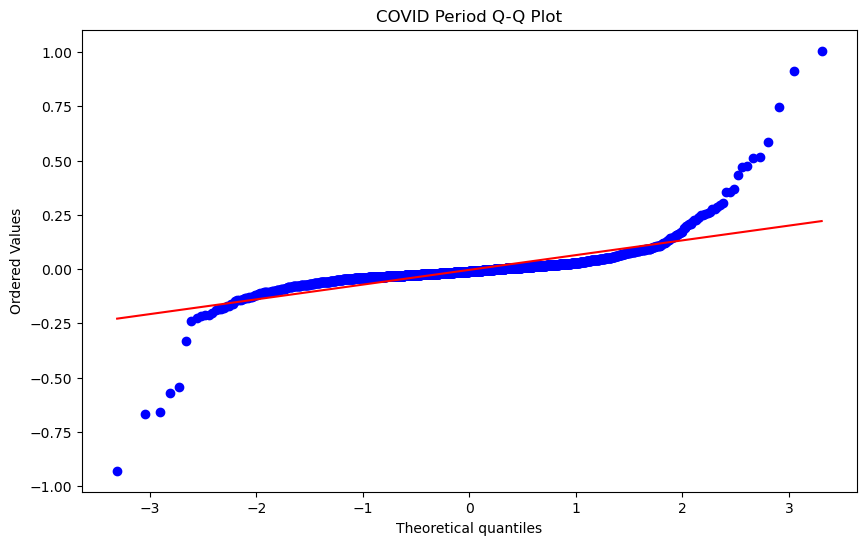

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


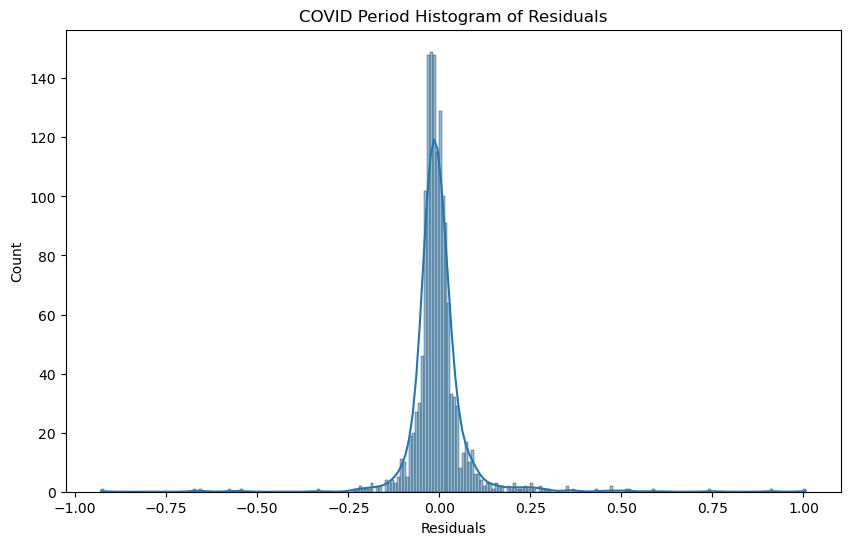

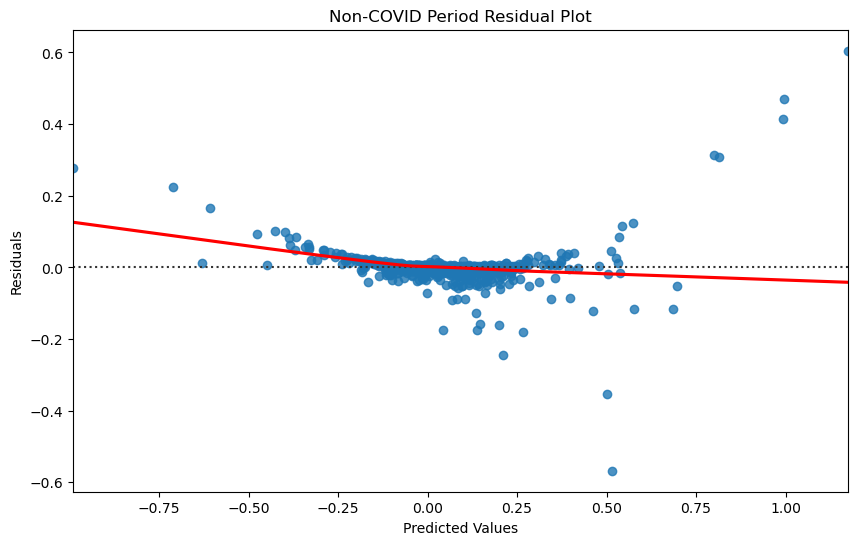

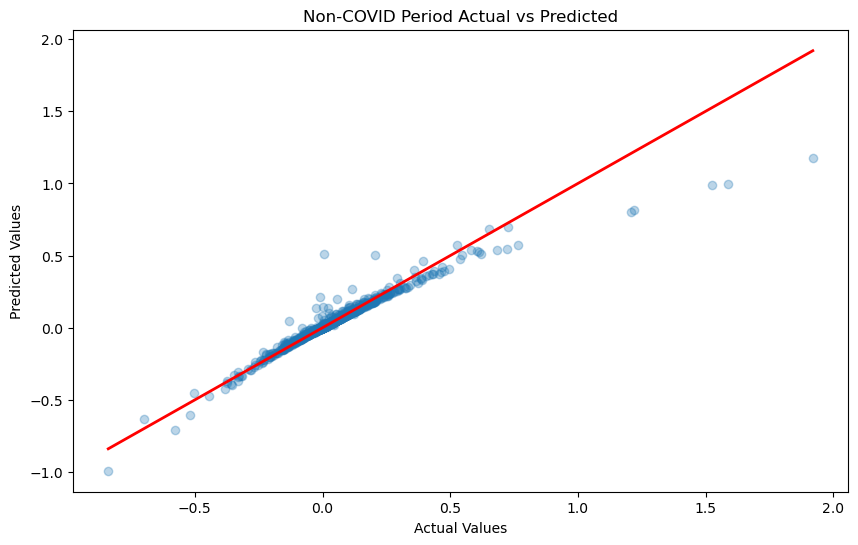

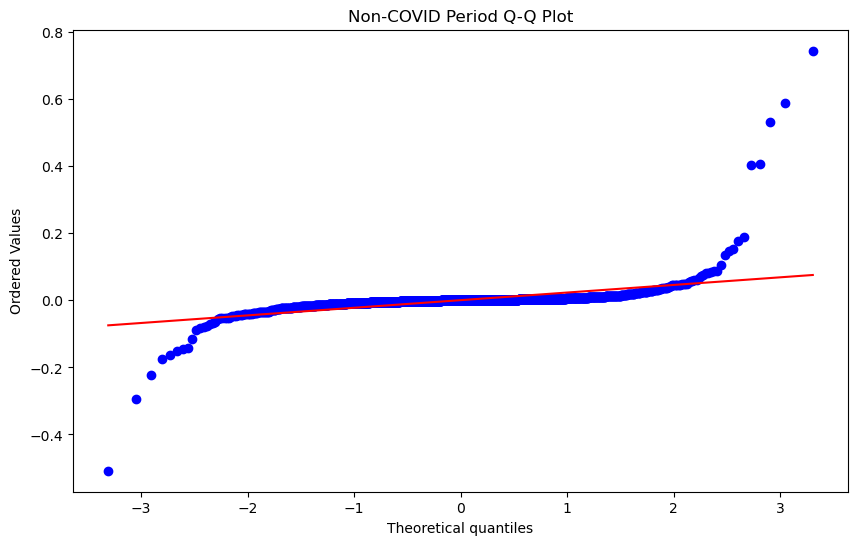

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


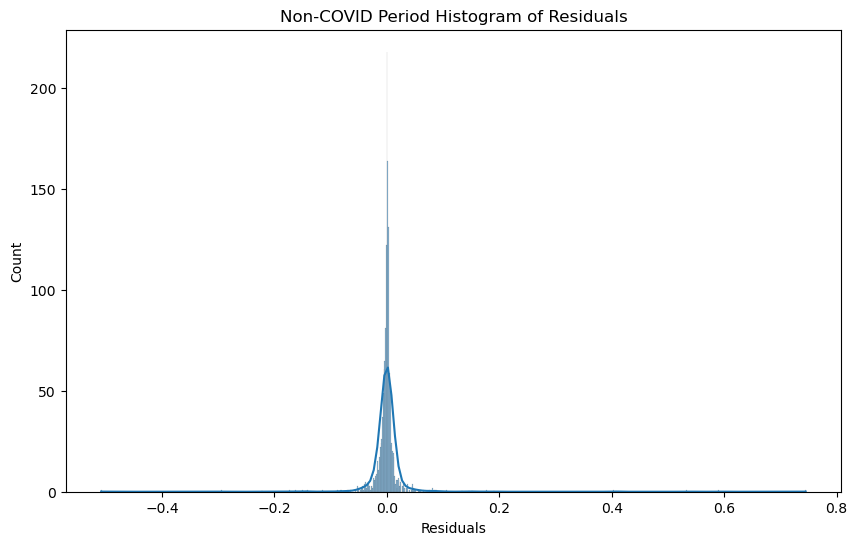

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to visualize model results
def visualize_model_results(y_test, y_pred, title_prefix):
    # Residuals
    residuals = y_test - y_pred

    # Residual Plot
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title_prefix} Residual Plot')
    plt.show()

    # Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title_prefix} Actual vs Predicted')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{title_prefix} Q-Q Plot')
    plt.show()

    # Histogram of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{title_prefix} Histogram of Residuals')
    plt.show()

# Visualize results for the COVID period model
visualize_model_results(y_covid_test, covid_y_pred, 'COVID Period')

# Visualize results for the non-COVID period model
visualize_model_results(y_non_covid_test, non_covid_y_pred, 'Non-COVID Period')


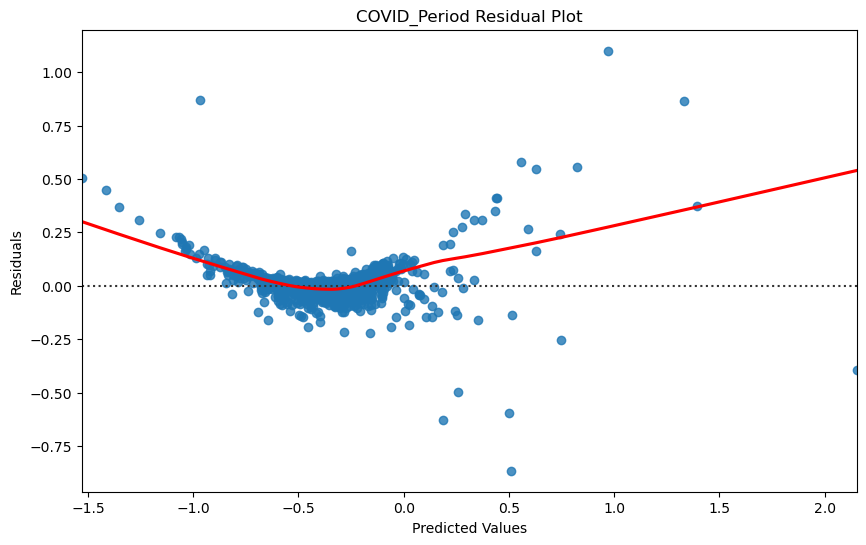

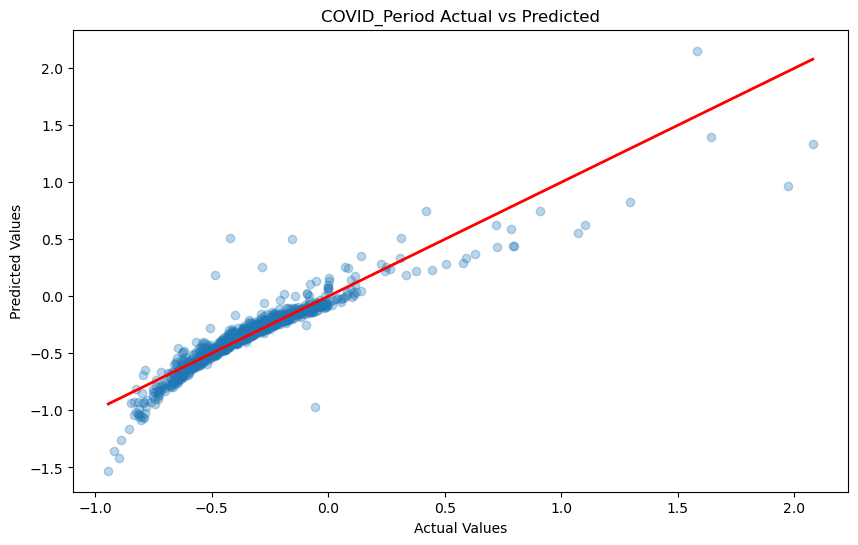

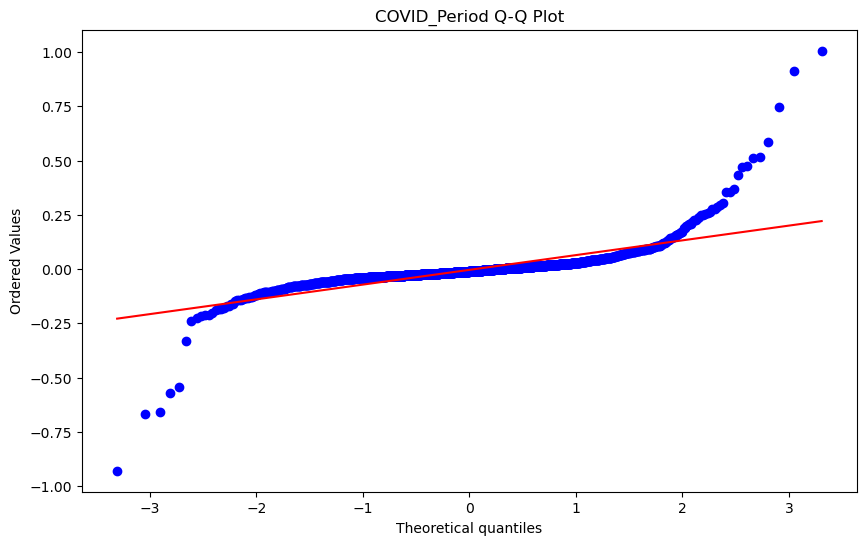

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


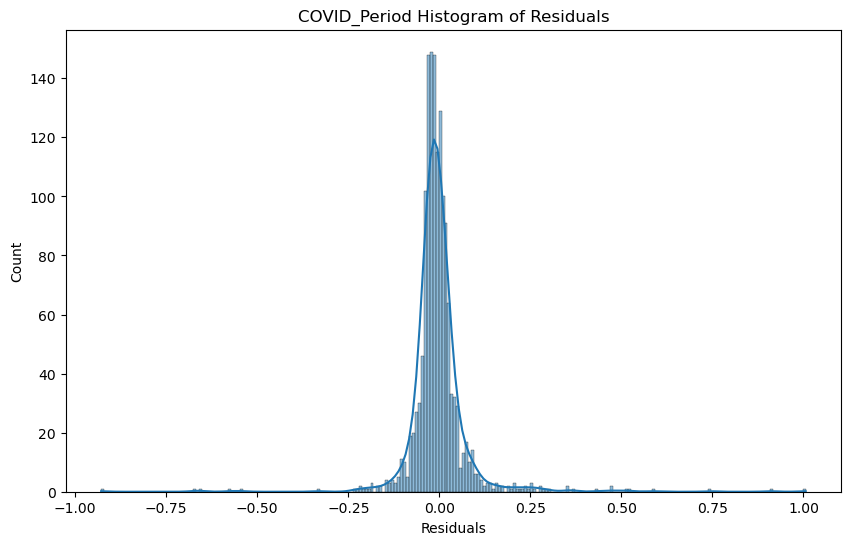

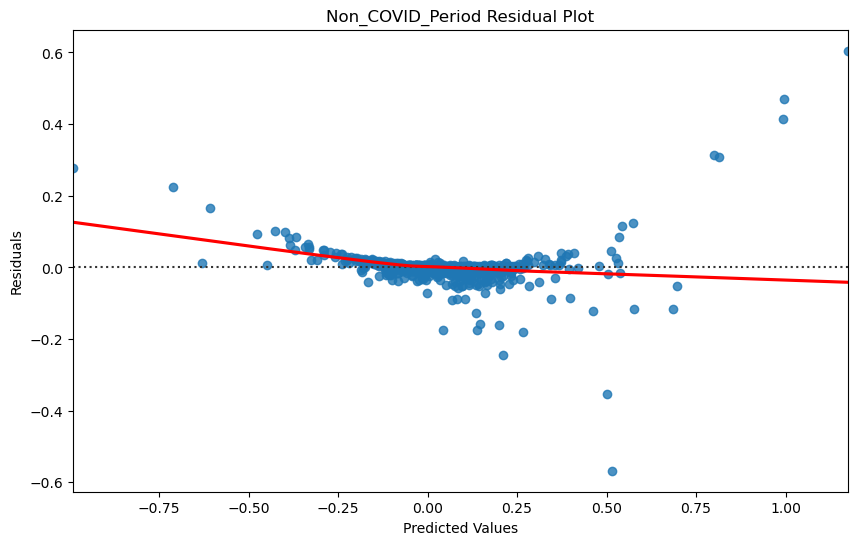

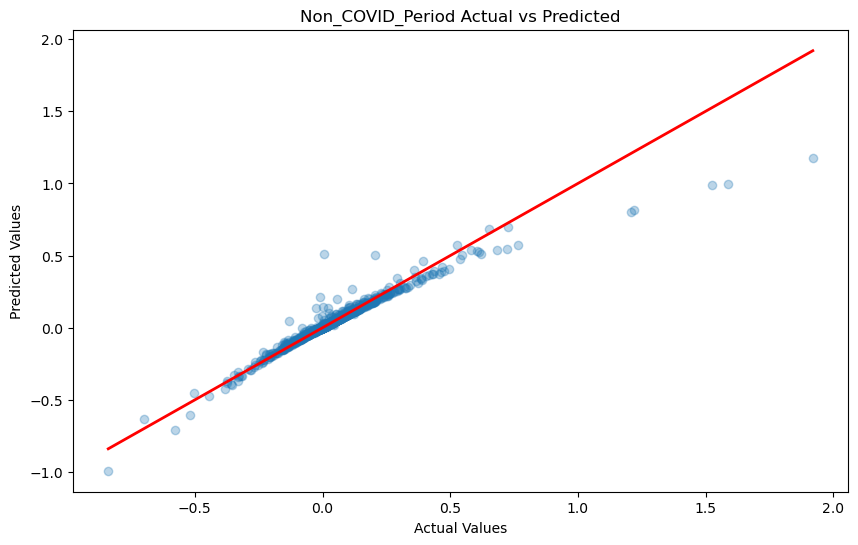

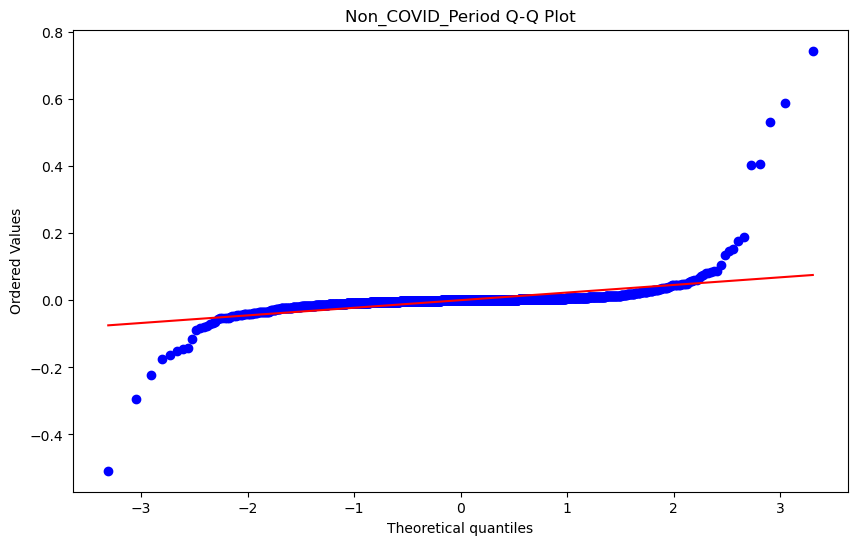

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


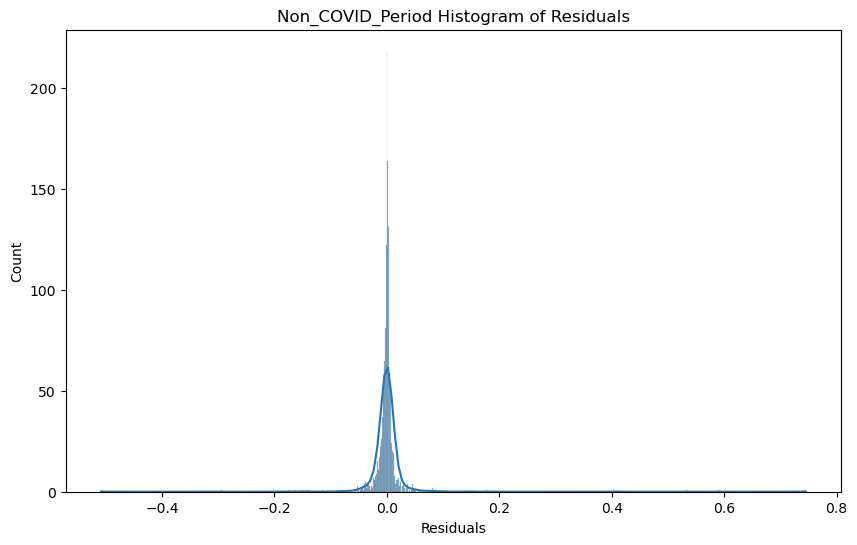

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to visualize and save model results
def visualize_model_results(y_test, y_pred, title_prefix, save_path):
    # Residuals
    residuals = y_test - y_pred

    # Residual Plot
    plt.figure(figsize=(10, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{title_prefix} Residual Plot')
    plt.savefig(f'{save_path}/{title_prefix}_Residual_Plot.png')
    plt.show()

    # Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title_prefix} Actual vs Predicted')
    plt.savefig(f'{save_path}/{title_prefix}_Actual_vs_Predicted.png')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{title_prefix} Q-Q Plot')
    plt.savefig(f'{save_path}/{title_prefix}_QQ_Plot.png')
    plt.show()

    # Histogram of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{title_prefix} Histogram of Residuals')
    plt.savefig(f'{save_path}/{title_prefix}_Histogram_of_Residuals.png')
    plt.show()

# Specify the directory where you want to save the plots
save_directory = '/Users/rohanpadaya/Desktop/pankit_assign/Task_2_plots'

# Visualize and save results for the COVID period model
visualize_model_results(y_covid_test, covid_y_pred, 'COVID_Period', save_directory)

# Visualize and save results for the non-COVID period model
visualize_model_results(y_non_covid_test, non_covid_y_pred, 'Non_COVID_Period', save_directory)


# Improving the model

In [94]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Select the predictors
predictors = ['PRC', 'VOL', 'BID', 'ASK', 'SHROUT', 'sprtrn']

# Standardize the predictors
scaler = StandardScaler()
X_covid_scaled = scaler.fit_transform(covid_data[predictors])
X_non_covid_scaled = scaler.fit_transform(non_covid_data[predictors])

# Add the constant for the intercept
X_covid_scaled = sm.add_constant(X_covid_scaled)
X_non_covid_scaled = sm.add_constant(X_non_covid_scaled)

# Fit the models with scaled data
model_covid_scaled = sm.OLS(y_covid, X_covid_scaled).fit()
model_non_covid_scaled = sm.OLS(y_non_covid, X_non_covid_scaled).fit()

# Print the summaries
print("Scaled COVID Period OLS Regression Summary:")
print(model_covid_scaled.summary())

print("\nScaled Non-COVID Period OLS Regression Summary:")
print(model_non_covid_scaled.summary())


Scaled COVID Period OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           COVID_Return   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     18.42
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           2.30e-21
Time:                        22:46:38   Log-Likelihood:                -1307.3
No. Observations:                7369   AIC:                             2629.
Df Residuals:                    7362   BIC:                             2677.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

## Stocks vs ETFs

In [95]:
# Assuming SHRCD 10 and 11 correspond to common stocks, and SHRCD 73 corresponds to ETFs

# Filter the data for Stocks (SHRCD = 10 or 11)
stocks_data = cleaned_data[(cleaned_data['SHRCD'] == 10) | (cleaned_data['SHRCD'] == 11)]

# Filter the data for ETFs (SHRCD = 73)
etfs_data = cleaned_data[cleaned_data['SHRCD'] == 73]

# Check the shapes to ensure correct filtering
print("Stocks data shape:", stocks_data.shape)
print("ETFs data shape:", etfs_data.shape)


Stocks data shape: (912451, 15)
ETFs data shape: (545978, 15)


In [96]:
# Compute cumulative returns for the COVID period
covid_period_start = '2020-02-14'
covid_period_end = '2020-03-20'
non_covid_period_start = '2019-08-20'  
non_covid_period_end = '2019-09-20'

# Define a function to compute cumulative returns
def compute_cumulative_return(data, start_date, end_date):
    period_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    cumulative_returns = period_data.groupby('PERMNO')['RET'].apply(lambda x: (1 + x).prod() - 1)
    return cumulative_returns

# Stocks
covid_returns_stocks = compute_cumulative_return(stocks_data, covid_period_start, covid_period_end)
non_covid_returns_stocks = compute_cumulative_return(stocks_data, non_covid_period_start, non_covid_period_end)

# ETFs
covid_returns_etfs = compute_cumulative_return(etfs_data, covid_period_start, covid_period_end)
non_covid_returns_etfs = compute_cumulative_return(etfs_data, non_covid_period_start, non_covid_period_end)


In [97]:
print(f"COVID Returns Stocks Length: {len(covid_returns_stocks)}")
print(f"Non-COVID Returns Stocks Length: {len(non_covid_returns_stocks)}")

print(f"COVID Returns ETFs Length: {len(covid_returns_etfs)}")
print(f"Non-COVID Returns ETFs Length: {len(non_covid_returns_etfs)}")


COVID Returns Stocks Length: 3600
Non-COVID Returns Stocks Length: 3634
COVID Returns ETFs Length: 2190
Non-COVID Returns ETFs Length: 2119


In [98]:
# Align the stocks returns
aligned_covid_returns_stocks, aligned_non_covid_returns_stocks = covid_returns_stocks.align(non_covid_returns_stocks, join='outer', fill_value=np.nan)

# Align the ETFs returns
aligned_covid_returns_etfs, aligned_non_covid_returns_etfs = covid_returns_etfs.align(non_covid_returns_etfs, join='outer', fill_value=np.nan)


In [99]:
# Merge returns into a single DataFrame for stocks
stocks_returns_df = pd.DataFrame({
    'PERMNO': aligned_covid_returns_stocks.index,
    'COVID_Return': aligned_covid_returns_stocks.values,
    'Non_COVID_Return': aligned_non_covid_returns_stocks.values
})

# Merge returns into a single DataFrame for ETFs
etfs_returns_df = pd.DataFrame({
    'PERMNO': aligned_covid_returns_etfs.index,
    'COVID_Return': aligned_covid_returns_etfs.values,
    'Non_COVID_Return': aligned_non_covid_returns_etfs.values
})


In [100]:
print(stocks_returns_df.head())
print(etfs_returns_df.head())


   PERMNO  COVID_Return  Non_COVID_Return
0   10026     -0.280867         -0.015127
1   10028      0.048427          0.231579
2   10032     -0.427277          0.065212
3   10044     -0.539688          0.054840
4   10051     -0.463254          0.122458
   PERMNO  COVID_Return  Non_COVID_Return
0   10113     -0.374419          0.001371
1   11182     -0.978588          0.160435
2   11264     -0.810558          0.199890
3   11407     -0.419614          0.046822
4   11996     -0.194233          0.012190


In [101]:
# Select only numeric columns
numeric_columns = stock_data_1_cleaned.select_dtypes(include=[np.number]).columns

# Calculate the explanatory variables for stocks during the COVID and Non-COVID periods
stocks_explanatory_covid = stock_data_1_cleaned[(stock_data_1_cleaned['date'] >= covid_period_start) & 
                                                (stock_data_1_cleaned['date'] <= covid_period_end) & 
                                                (stock_data_1_cleaned['SHRCD'].isin([10, 11]))][numeric_columns].groupby('PERMNO').mean()

stocks_explanatory_non_covid = stock_data_1_cleaned[(stock_data_1_cleaned['date'] >= non_covid_period_start) & 
                                                    (stock_data_1_cleaned['date'] <= non_covid_period_end) & 
                                                    (stock_data_1_cleaned['SHRCD'].isin([10, 11]))][numeric_columns].groupby('PERMNO').mean()

# Calculate the explanatory variables for ETFs during the COVID and Non-COVID periods
etfs_explanatory_covid = stock_data_1_cleaned[(stock_data_1_cleaned['date'] >= covid_period_start) & 
                                              (stock_data_1_cleaned['date'] <= covid_period_end) & 
                                              (stock_data_1_cleaned['SHRCD'] == 73)][numeric_columns].groupby('PERMNO').mean()

etfs_explanatory_non_covid = stock_data_1_cleaned[(stock_data_1_cleaned['date'] >= non_covid_period_start) & 
                                                  (stock_data_1_cleaned['date'] <= non_covid_period_end) & 
                                                  (stock_data_1_cleaned['SHRCD'] == 73)][numeric_columns].groupby('PERMNO').mean()


In [102]:
# Combine the COVID and Non-COVID explanatory variables for stocks
stocks_explanatory = (stocks_explanatory_covid + stocks_explanatory_non_covid) / 2

# Combine the COVID and Non-COVID explanatory variables for ETFs
etfs_explanatory = (etfs_explanatory_covid + etfs_explanatory_non_covid) / 2

# Merge the explanatory variables with the returns data
stocks_combined = stocks_returns_df.merge(stocks_explanatory, on='PERMNO', how='left')
etfs_combined = etfs_returns_df.merge(etfs_explanatory, on='PERMNO', how='left')


In [103]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets for stocks
X_stocks = stocks_combined.drop(['PERMNO', 'COVID_Return', 'Non_COVID_Return'], axis=1)
y_stocks_covid = stocks_combined['COVID_Return']
y_stocks_non_covid = stocks_combined['Non_COVID_Return']

X_stocks_train, X_stocks_test, y_stocks_covid_train, y_stocks_covid_test = train_test_split(X_stocks, y_stocks_covid, test_size=0.2, random_state=42)
X_stocks_train, X_stocks_test, y_stocks_non_covid_train, y_stocks_non_covid_test = train_test_split(X_stocks, y_stocks_non_covid, test_size=0.2, random_state=42)

# Splitting data into training and testing sets for ETFs
X_etfs = etfs_combined.drop(['PERMNO', 'COVID_Return', 'Non_COVID_Return'], axis=1)
y_etfs_covid = etfs_combined['COVID_Return']
y_etfs_non_covid = etfs_combined['Non_COVID_Return']

X_etfs_train, X_etfs_test, y_etfs_covid_train, y_etfs_covid_test = train_test_split(X_etfs, y_etfs_covid, test_size=0.2, random_state=42)
X_etfs_train, X_etfs_test, y_etfs_non_covid_train, y_etfs_non_covid_test = train_test_split(X_etfs, y_etfs_non_covid, test_size=0.2, random_state=42)


In [104]:
# Check for missing values in stocks data
missing_stocks = X_stocks_train.isnull().sum()
print("Missing values in Stocks training data:\n", missing_stocks[missing_stocks > 0])

# Check for infinite values in stocks data
infinite_stocks = np.isinf(X_stocks_train).sum()
print("Infinite values in Stocks training data:\n", infinite_stocks[infinite_stocks > 0])

# Check for missing values in ETFs data
missing_etfs = X_etfs_train.isnull().sum()
print("Missing values in ETFs training data:\n", missing_etfs[missing_etfs > 0])

# Check for infinite values in ETFs data
infinite_etfs = np.isinf(X_etfs_train).sum()
print("Infinite values in ETFs training data:\n", infinite_etfs[infinite_etfs > 0])


Missing values in Stocks training data:
 SHRCD     167
PERMCO    167
BIDLO     167
ASKHI     167
PRC       167
VOL       167
RET       167
BID       167
ASK       167
SHROUT    167
sprtrn    167
dtype: int64
Infinite values in Stocks training data:
 Series([], dtype: int64)
Missing values in ETFs training data:
 SHRCD     163
PERMCO    163
BIDLO     163
ASKHI     163
PRC       163
VOL       163
RET       163
BID       163
ASK       163
SHROUT    163
sprtrn    163
dtype: int64
Infinite values in ETFs training data:
 Series([], dtype: int64)


In [105]:
# Fill missing values with column mean for Stocks training and testing data
X_stocks_train.fillna(X_stocks_train.mean(), inplace=True)
X_stocks_test.fillna(X_stocks_test.mean(), inplace=True)

# Fill missing values with column mean for ETFs training and testing data
X_etfs_train.fillna(X_etfs_train.mean(), inplace=True)
X_etfs_test.fillna(X_etfs_test.mean(), inplace=True)


In [106]:
# Check for missing values in stocks data
missing_stocks = X_stocks_train.isnull().sum()
print("Missing values in Stocks training data:\n", missing_stocks[missing_stocks > 0])

# Check for infinite values in stocks data
infinite_stocks = np.isinf(X_stocks_train).sum()
print("Infinite values in Stocks training data:\n", infinite_stocks[infinite_stocks > 0])

# Check for missing values in ETFs data
missing_etfs = X_etfs_train.isnull().sum()
print("Missing values in ETFs training data:\n", missing_etfs[missing_etfs > 0])

# Check for infinite values in ETFs data
infinite_etfs = np.isinf(X_etfs_train).sum()
print("Infinite values in ETFs training data:\n", infinite_etfs[infinite_etfs > 0])


Missing values in Stocks training data:
 Series([], dtype: int64)
Infinite values in Stocks training data:
 Series([], dtype: int64)
Missing values in ETFs training data:
 Series([], dtype: int64)
Infinite values in ETFs training data:
 Series([], dtype: int64)


In [107]:
# Ensure that all NaN values are filled with column means
X_stocks_train = X_stocks_train.fillna(X_stocks_train.mean())
X_stocks_test = X_stocks_test.fillna(X_stocks_test.mean())
X_etfs_train = X_etfs_train.fillna(X_etfs_train.mean())
X_etfs_test = X_etfs_test.fillna(X_etfs_test.mean())

# Ensure there are no NaN values in the target variable as well
y_stocks_covid_train = y_stocks_covid_train.fillna(y_stocks_covid_train.mean())
y_stocks_covid_test = y_stocks_covid_test.fillna(y_stocks_covid_test.mean())
y_stocks_non_covid_train = y_stocks_non_covid_train.fillna(y_stocks_non_covid_train.mean())
y_stocks_non_covid_test = y_stocks_non_covid_test.fillna(y_stocks_non_covid_test.mean())

y_etfs_covid_train = y_etfs_covid_train.fillna(y_etfs_covid_train.mean())
y_etfs_covid_test = y_etfs_covid_test.fillna(y_etfs_covid_test.mean())
y_etfs_non_covid_train = y_etfs_non_covid_train.fillna(y_etfs_non_covid_train.mean())
y_etfs_non_covid_test = y_etfs_non_covid_test.fillna(y_etfs_non_covid_test.mean())

# Rerun the OLS models
print("Stocks - COVID Period OLS Model:")
stocks_covid_model, stocks_covid_y_pred = fit_and_evaluate_ols_model(X_stocks_train, y_stocks_covid_train, X_stocks_test, y_stocks_covid_test)

print("\nStocks - Non-COVID Period OLS Model:")
stocks_non_covid_model, stocks_non_covid_y_pred = fit_and_evaluate_ols_model(X_stocks_train, y_stocks_non_covid_train, X_stocks_test, y_stocks_non_covid_test)

print("\nETFs - COVID Period OLS Model:")
etfs_covid_model, etfs_covid_y_pred = fit_and_evaluate_ols_model(X_etfs_train, y_etfs_covid_train, X_etfs_test, y_etfs_covid_test)

print("\nETFs - Non-COVID Period OLS Model:")
etfs_non_covid_model, etfs_non_covid_y_pred = fit_and_evaluate_ols_model(X_etfs_train, y_etfs_non_covid_train, X_etfs_test, y_etfs_non_covid_test)


Stocks - COVID Period OLS Model:
                            OLS Regression Results                            
Dep. Variable:           COVID_Return   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     495.9
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:46:40   Log-Likelihood:                 961.31
No. Observations:                2978   AIC:                            -1901.
Df Residuals:                    2967   BIC:                            -1835.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SHRCD          0.01

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    # Add a constant (intercept) to the model
    X = sm.add_constant(X)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data

# Calculate VIF for stocks
print("VIF for Stocks Predictors:")
vif_stocks = calculate_vif(X_stocks_train)
print(vif_stocks)

# Calculate VIF for ETFs
print("\nVIF for ETFs Predictors:")
vif_etfs = calculate_vif(X_etfs_train)
print(vif_etfs)


VIF for Stocks Predictors:
   feature           VIF
0    SHRCD  5.533000e+02
1   PERMCO  1.021704e+00
2    BIDLO  3.292841e+08
3    ASKHI  1.366740e+08
4      PRC  3.438936e+05
5      VOL  2.681399e+00
6      RET  1.027411e+00
7      BID  3.521087e+08
8      ASK  2.902207e+08
9   SHROUT  2.693797e+00
10  sprtrn  1.001491e+00

VIF for ETFs Predictors:
   feature            VIF
0    SHRCD     115.829450
1   PERMCO       1.207130
2    BIDLO  101895.448535
3    ASKHI   76377.517060
4      PRC      31.703794
5      VOL       1.505364
6      RET       1.054382
7      BID  157429.362790
8      ASK  168479.288843
9   SHROUT       1.564770
10  sprtrn       1.032144


In [109]:
# Removing BIDLO, ASKHI, BID, and ASK due to high VIF
X_stocks_train_reduced = X_stocks_train.drop(columns=['BIDLO', 'ASKHI', 'BID', 'ASK'])
X_stocks_test_reduced = X_stocks_test.drop(columns=['BIDLO', 'ASKHI', 'BID', 'ASK'])

X_etfs_train_reduced = X_etfs_train.drop(columns=['BIDLO', 'ASKHI', 'BID', 'ASK'])
X_etfs_test_reduced = X_etfs_test.drop(columns=['BIDLO', 'ASKHI', 'BID', 'ASK'])


In [110]:
# Recalculate VIF after removing the highly correlated predictors
print("VIF for Reduced Stocks Predictors:")
vif_stocks_reduced = calculate_vif(X_stocks_train_reduced)
print(vif_stocks_reduced)

print("\nVIF for Reduced ETFs Predictors:")
vif_etfs_reduced = calculate_vif(X_etfs_train_reduced)
print(vif_etfs_reduced)


VIF for Reduced Stocks Predictors:
  feature         VIF
0   SHRCD  553.267030
1  PERMCO    1.013037
2     PRC    1.001333
3     VOL    2.679719
4     RET    1.005723
5  SHROUT    2.691333
6  sprtrn    1.000601

VIF for Reduced ETFs Predictors:
  feature         VIF
0   SHRCD  113.997116
1  PERMCO    1.184774
2     PRC    1.186772
3     VOL    1.483176
4     RET    1.021452
5  SHROUT    1.540221
6  sprtrn    1.024277


In [111]:
# Removing SHRCD due to high VIF
X_stocks_train_final = X_stocks_train_reduced.drop(columns=['SHRCD'])
X_stocks_test_final = X_stocks_test_reduced.drop(columns=['SHRCD'])

X_etfs_train_final = X_etfs_train_reduced.drop(columns=['SHRCD'])
X_etfs_test_final = X_etfs_test_reduced.drop(columns=['SHRCD'])

# Recalculate VIF after removing SHRCD
print("VIF for Final Stocks Predictors:")
vif_stocks_final = calculate_vif(X_stocks_train_final)
print(vif_stocks_final)

print("\nVIF for Final ETFs Predictors:")
vif_etfs_final = calculate_vif(X_etfs_train_final)
print(vif_etfs_final)


VIF for Final Stocks Predictors:
  feature         VIF
0   const  553.267030
1  PERMCO    1.013037
2     PRC    1.001333
3     VOL    2.679719
4     RET    1.005723
5  SHROUT    2.691333
6  sprtrn    1.000601

VIF for Final ETFs Predictors:
  feature         VIF
0   const  113.997116
1  PERMCO    1.184774
2     PRC    1.186772
3     VOL    1.483176
4     RET    1.021452
5  SHROUT    1.540221
6  sprtrn    1.024277


In [112]:
# Rerun the OLS models with the final predictor set
print("Stocks - COVID Period OLS Model:")
stocks_covid_model_final, stocks_covid_y_pred_final = fit_and_evaluate_ols_model(X_stocks_train_final, y_stocks_covid_train, X_stocks_test_final, y_stocks_covid_test)

print("\nStocks - Non-COVID Period OLS Model:")
stocks_non_covid_model_final, stocks_non_covid_y_pred_final = fit_and_evaluate_ols_model(X_stocks_train_final, y_stocks_non_covid_train, X_stocks_test_final, y_stocks_non_covid_test)

print("\nETFs - COVID Period OLS Model:")
etfs_covid_model_final, etfs_covid_y_pred_final = fit_and_evaluate_ols_model(X_etfs_train_final, y_etfs_covid_train, X_etfs_test_final, y_etfs_covid_test)

print("\nETFs - Non-COVID Period OLS Model:")
etfs_non_covid_model_final, etfs_non_covid_y_pred_final = fit_and_evaluate_ols_model(X_etfs_train_final, y_etfs_non_covid_train, X_etfs_test_final, y_etfs_non_covid_test)


Stocks - COVID Period OLS Model:
                            OLS Regression Results                            
Dep. Variable:           COVID_Return   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     823.4
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:46:40   Log-Likelihood:                 956.57
No. Observations:                2978   AIC:                            -1899.
Df Residuals:                    2971   BIC:                            -1857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.16

In [113]:
from sklearn.model_selection import train_test_split

# Combine the data for both stocks and ETFs
combined_data = pd.concat([stocks_combined, etfs_combined])

# Splitting combined data into training and testing sets for the COVID period
X_combined = combined_data.drop(['PERMNO', 'COVID_Return', 'Non_COVID_Return'], axis=1)
y_combined_covid = combined_data['COVID_Return']

X_combined_train, X_combined_test, y_combined_covid_train, y_combined_covid_test = train_test_split(
    X_combined, y_combined_covid, test_size=0.2, random_state=42
)


In [114]:
# Fill missing values with column mean for Combined training and testing data
X_combined_train.fillna(X_combined_train.mean(), inplace=True)
X_combined_test.fillna(X_combined_test.mean(), inplace=True)

# Ensure there are no NaN values in the target variable as well
y_combined_covid_train = y_combined_covid_train.fillna(y_combined_covid_train.mean())
y_combined_covid_test = y_combined_covid_test.fillna(y_combined_covid_test.mean())

# Check for infinite values and replace them
X_combined_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_combined_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_combined_covid_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_combined_covid_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values again after handling infinities
X_combined_train.fillna(X_combined_train.mean(), inplace=True)
X_combined_test.fillna(X_combined_test.mean(), inplace=True)
y_combined_covid_train.fillna(y_combined_covid_train.mean(), inplace=True)
y_combined_covid_test.fillna(y_combined_covid_test.mean(), inplace=True)

# Now, re-run the OLS model for the combined data during the COVID period
print("Combined - COVID Period OLS Model:")
combined_covid_model, combined_covid_y_pred = fit_and_evaluate_ols_model(
    X_combined_train, y_combined_covid_train, X_combined_test, y_combined_covid_test
)


Combined - COVID Period OLS Model:
                            OLS Regression Results                            
Dep. Variable:           COVID_Return   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     880.4
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:46:40   Log-Likelihood:                 1583.6
No. Observations:                4781   AIC:                            -3143.
Df Residuals:                    4769   BIC:                            -3066.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


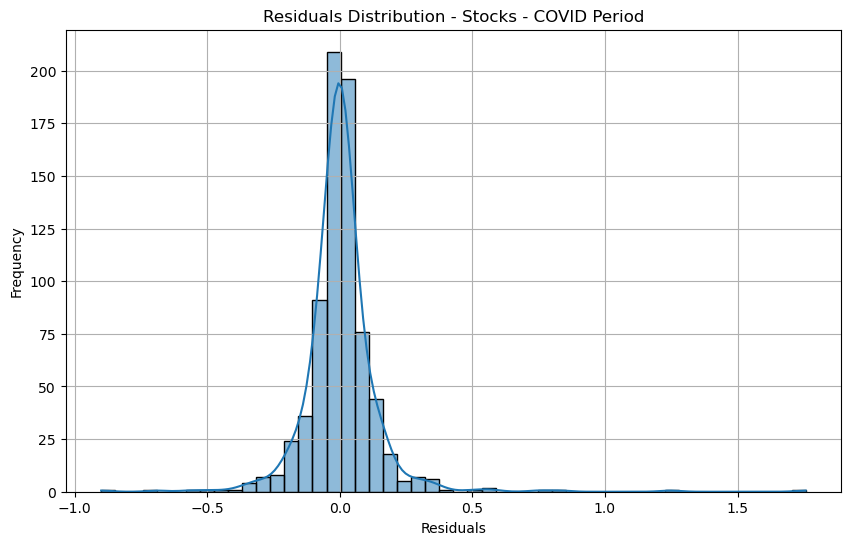

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


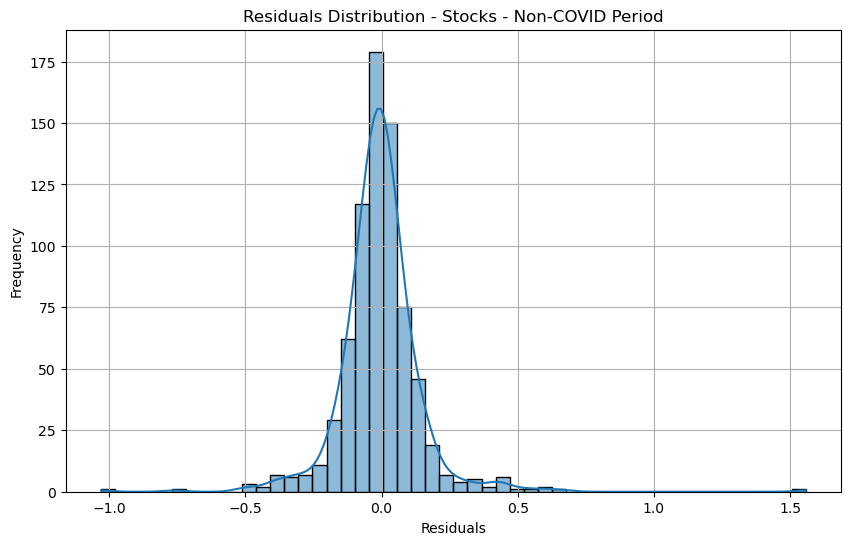

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


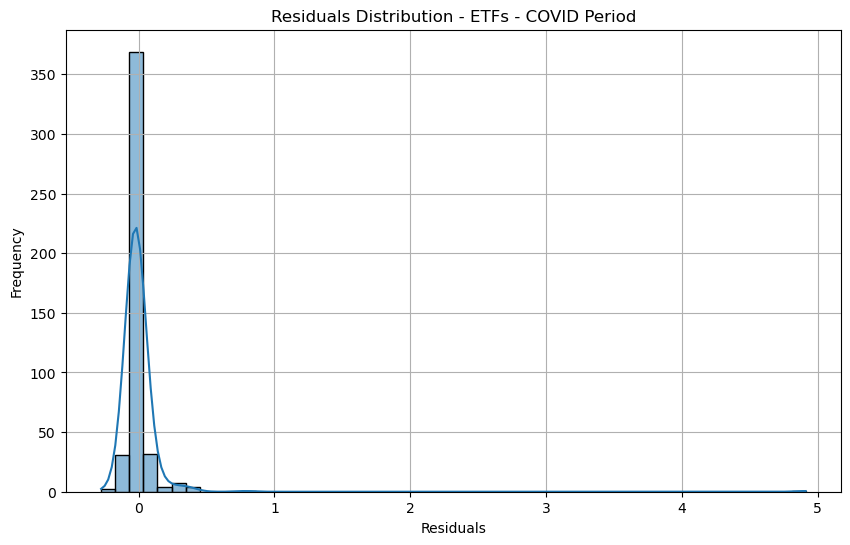

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


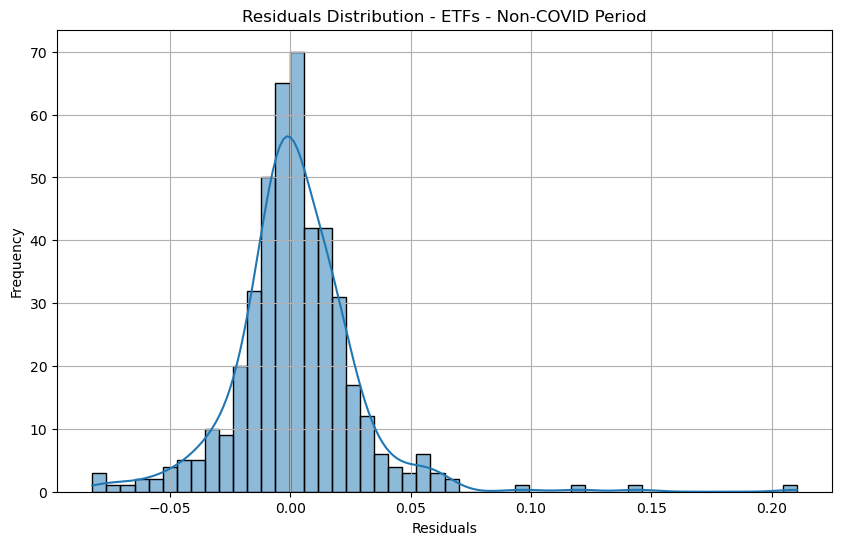

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


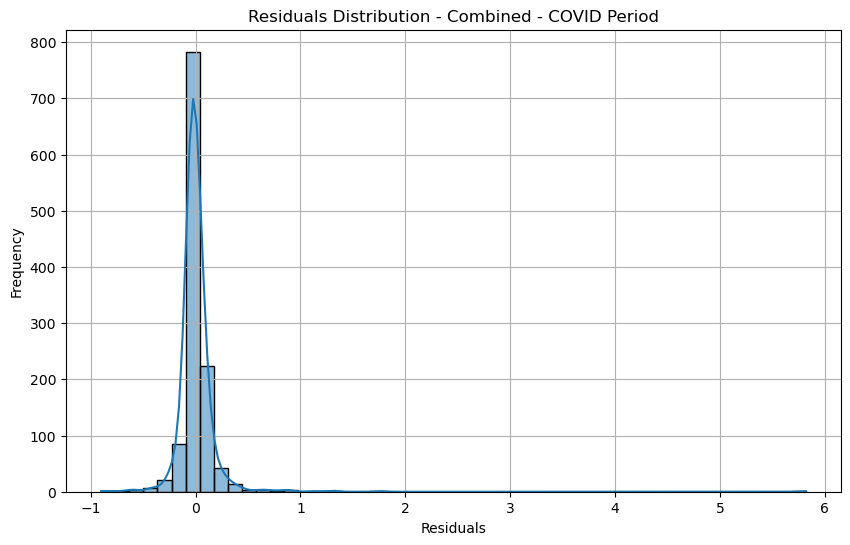

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot residuals
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=50)
    plt.title(f'Residuals Distribution - {title}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot residuals for each model
plot_residuals(y_stocks_covid_test, stocks_covid_y_pred, 'Stocks - COVID Period')
plot_residuals(y_stocks_non_covid_test, stocks_non_covid_y_pred, 'Stocks - Non-COVID Period')
plot_residuals(y_etfs_covid_test, etfs_covid_y_pred, 'ETFs - COVID Period')
plot_residuals(y_etfs_non_covid_test, etfs_non_covid_y_pred, 'ETFs - Non-COVID Period')
plot_residuals(y_combined_covid_test, combined_covid_y_pred, 'Combined - COVID Period')


In [116]:
import pandas as pd

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': ['Stocks - COVID Period', 'Stocks - Non-COVID Period', 'ETFs - COVID Period', 
              'ETFs - Non-COVID Period', 'Combined - COVID Period'],
    'R-squared': [r2_score(y_stocks_covid_test, stocks_covid_y_pred),
                  r2_score(y_stocks_non_covid_test, stocks_non_covid_y_pred),
                  r2_score(y_etfs_covid_test, etfs_covid_y_pred),
                  r2_score(y_etfs_non_covid_test, etfs_non_covid_y_pred),
                  r2_score(y_combined_covid_test, combined_covid_y_pred)],
    'MSE': [mean_squared_error(y_stocks_covid_test, stocks_covid_y_pred),
            mean_squared_error(y_stocks_non_covid_test, stocks_non_covid_y_pred),
            mean_squared_error(y_etfs_covid_test, etfs_covid_y_pred),
            mean_squared_error(y_etfs_non_covid_test, etfs_non_covid_y_pred),
            mean_squared_error(y_combined_covid_test, combined_covid_y_pred)],
    'RMSE': [mean_squared_error(y_stocks_covid_test, stocks_covid_y_pred, squared=False),
             mean_squared_error(y_stocks_non_covid_test, stocks_non_covid_y_pred, squared=False),
             mean_squared_error(y_etfs_covid_test, etfs_covid_y_pred, squared=False),
             mean_squared_error(y_etfs_non_covid_test, etfs_non_covid_y_pred, squared=False),
             mean_squared_error(y_combined_covid_test, combined_covid_y_pred, squared=False)],
    'MAE': [mean_absolute_error(y_stocks_covid_test, stocks_covid_y_pred),
            mean_absolute_error(y_stocks_non_covid_test, stocks_non_covid_y_pred),
            mean_absolute_error(y_etfs_covid_test, etfs_covid_y_pred),
            mean_absolute_error(y_etfs_non_covid_test, etfs_non_covid_y_pred),
            mean_absolute_error(y_combined_covid_test, combined_covid_y_pred)]
})

metrics_df


,Model,R-squared,MSE,RMSE,MAE
0,Stocks - COVID Period,0.573343,0.021876,0.147906,0.081287
1,Stocks - Non-COVID Period,0.098069,0.022824,0.151076,0.094115
2,ETFs - COVID Period,0.710168,0.059640,0.244212,0.055483
3,ETFs - Non-COVID Period,0.469296,0.000683,0.026128,0.017114
4,Combined - COVID Period,0.565519,0.051835,0.227673,0.087408


In [117]:
stock_data_1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1926738 entries, 0 to 1938800
Data columns (total 15 columns):
 #   Column  Dtype         
---  ------  -----         
 0   PERMNO  int64         
 1   date    datetime64[ns]
 2   SHRCD   float64       
 3   TICKER  object        
 4   COMNAM  object        
 5   PERMCO  int64         
 6   BIDLO   float64       
 7   ASKHI   float64       
 8   PRC     float64       
 9   VOL     float64       
 10  RET     float64       
 11  BID     float64       
 12  ASK     float64       
 13  SHROUT  float64       
 14  sprtrn  float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 235.2+ MB
